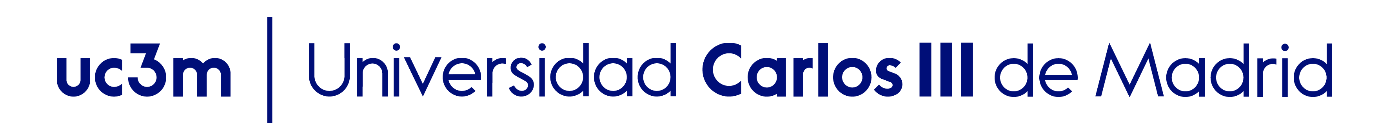**Practice 3**

**Student:** Katarzyna Klęczek **NIA:** 100549157

**Student:** Rylie Ramos-Marquez  **NIA:** 100530337

**General instructions:** Company is very happy with your previous report and wants to give you more responsibility, this could be very good for your department and career. They ask us two questions:

**Main Questions are:**

1.   *R1 “Give us a prediction of the total sales and
the total profit for the last quarter (Quarter 4)
of 2024, show it in overall and per category”*

2.   *R2 “We need models that correctly classifies
and predicts if a customer is going to buy when
accessing our website”*


# Step 1: Data Collect

# Step 2: Data preprocessing (old)

Loading the data and making sure that all the variables are in correct format and type for later analysis

## Loading of 2 different datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats


In [ ]:
# load first data file
df_2122= pd.read_csv("acme_2021_2022.csv", parse_dates=["Order Date", "Ship Date"], dayfirst=False)
#check how the data looks like
df_2122.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,90032,3,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,"51,16",7,"0,0","14,5"
1,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,90032,3,OFF-AR-10002833,Office Supplies,Art,Newell 322,"7,62",4,"0,0","2,01"
2,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,90032,3,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,"949,79",6,"0,2","92,8"
3,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,90032,3,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,"19,37",3,"0,2","5,92"
4,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,90032,3,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,"120,3",5,"0,0","35,26"


In [ ]:
#check the format of all the variables
df_2122.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084 entries, 0 to 4083
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       4084 non-null   object        
 1   Order Date     4084 non-null   datetime64[ns]
 2   Ship Date      4084 non-null   datetime64[ns]
 3   Ship Mode      4084 non-null   object        
 4   Customer ID    4084 non-null   object        
 5   Customer Name  4084 non-null   object        
 6   Segment        4084 non-null   object        
 7   Country        4084 non-null   object        
 8   City           4084 non-null   object        
 9   State          4084 non-null   object        
 10  Postal Code    4084 non-null   int64         
 11  Region         4084 non-null   int64         
 12  Product ID     4084 non-null   object        
 13  Category       4084 non-null   object        
 14  Sub-Category   4084 non-null   object        
 15  Product Name   4084 n

In [ ]:
# Convert type to float for 'Sales', 'Discount', and 'Profit' columns
for column in ['Sales', 'Discount', 'Profit']:
  df_2122[column] = df_2122[column].str.replace(',', '.').astype(float)


In [ ]:
# make a new column year and splitting by year to separate dataframes
df_2122['Year'] = pd.DatetimeIndex(df_2122['Order Date']).year
df_21= df_2122.loc[df_2122['Year'] == 2021]
df_22= df_2122.loc[df_2122['Year'] == 2022]


In [ ]:
# load second data file and also check how the data looks like and the types of variables
df_2324 = pd.read_json("acme_2023_2024.json")
#df_2324.head()
df_2324.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4220 entries, 0 to 4219
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       4220 non-null   object 
 1   Order Date     4220 non-null   object 
 2   Ship Date      4220 non-null   object 
 3   Ship Mode      4220 non-null   object 
 4   Customer ID    4220 non-null   object 
 5   Customer Name  4220 non-null   object 
 6   Segment        4220 non-null   object 
 7   Country        4220 non-null   object 
 8   City           4220 non-null   object 
 9   State          4220 non-null   object 
 10  Postal Code    4220 non-null   int64  
 11  Region         4220 non-null   int64  
 12  Product ID     4220 non-null   object 
 13  Category       4220 non-null   object 
 14  Sub-Category   4220 non-null   object 
 15  Product Name   4220 non-null   object 
 16  Sales          4220 non-null   float64
 17  Quantity       4220 non-null   int64  
 18  Discount

In [ ]:
# changing the format of the columns with dates to be dates,
df_2324['Order Date'] = pd.to_datetime(df_2324['Order Date'], format='%d/%m/%Y')
df_2324['Ship Date'] = pd.to_datetime(df_2324['Ship Date'], format='%d/%m/%Y')

# creating new column year and splitting by year
df_2324['Year'] = pd.DatetimeIndex(df_2324['Order Date']).year
df_23= df_2324.loc[df_2324['Year'] == 2023]
df_24= df_2324.loc[df_2324['Year'] == 2024]

## Data cleaning and fix

Now checking the basic statistics of each year to try to understand the data and see if it make sense

In [ ]:
df_21.describe()

,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,1979,1979,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.0
mean,2021-08-11 12:07:38.413339904,2021-08-08 03:22:17.038908672,57058.688732,1.587165,253.414361,3.798888,0.159101,24.863936,2021.0
min,2021-01-04 00:00:00,2021-01-03 00:00:00,1841.000000,0.000000,0.890000,1.000000,0.000000,-3787.040000,2021.0
25%,2021-05-22 00:00:00,2021-05-16 00:00:00,27707.000000,0.000000,16.845000,2.000000,0.000000,1.670000,2021.0
50%,2021-09-07 00:00:00,2021-08-30 00:00:00,60623.000000,2.000000,54.400000,3.000000,0.200000,8.180000,2021.0
75%,2021-11-10 00:00:00,2021-11-09 00:00:00,90008.000000,3.000000,228.625000,5.000000,0.200000,28.645000,2021.0
max,2021-12-31 00:00:00,2022-01-02 00:00:00,99301.000000,3.000000,23702.490000,14.000000,0.800000,4736.980000,2021.0
std,NaN,NaN,31658.997608,1.192688,790.751948,2.243737,0.206097,203.485108,0.0


In [ ]:
# we check the profits to see if there are any abnormalities, such as very high ones or very low ones
profit_list = list(df_21["Profit"])
sorted_profit_list = sorted(profit_list, reverse=True)
print(sorted_profit_list[0:5], sorted_profit_list[-5:-1])

[4736.98, 2291.51, 2041.9, 1403.54, 1305.85] [-966.73, -1391.27, -1514.07, -1852.73]


The profit in the 2021 looks fine

In [ ]:
df_22.describe()


,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,2105,2105,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.0
mean,2022-08-13 02:14:04.845605632,2022-08-12 14:48:37.624703232,52682.340143,1.458907,274.519990,3.797150,0.154627,41.417729,2022.0
min,2022-01-02 00:00:00,2021-01-03 00:00:00,1040.000000,0.000000,1.200000,1.000000,0.000000,-3695.990000,2022.0
25%,2022-05-26 00:00:00,2022-05-27 00:00:00,19805.000000,0.000000,21.370000,2.000000,0.000000,2.350000,2022.0
50%,2022-09-06 00:00:00,2022-09-09 00:00:00,48227.000000,1.000000,73.080000,3.000000,0.100000,13.060000,2022.0
75%,2022-11-13 00:00:00,2022-11-15 00:00:00,85705.000000,3.000000,259.790000,5.000000,0.200000,48.180000,2022.0
max,2022-12-31 00:00:00,2023-01-02 00:00:00,99207.000000,3.000000,7753.040000,14.000000,0.800000,4448.460000,2022.0
std,NaN,NaN,32286.263098,1.216704,571.848879,2.237384,0.208465,259.328928,0.0


In [ ]:
profit_list = list(df_22["Profit"])
sorted_profit_list = sorted(profit_list, reverse=True)
print(sorted_profit_list[0:5], sorted_profit_list[-5:-1])

[4448.46, 3224.15, 3120.63, 2669.08, 2072.65] [-1491.52, -1653.8, -2331.07, -2607.24]


In [ ]:
df_23.describe()

,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,2582,2582,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.0
mean,2023-08-08 07:06:05.298218496,2023-08-07 20:52:03.160340736,54506.855926,1.485670,360.640736,3.805964,0.154539,70.495387,2023.0
min,2023-01-02 00:00:00,2022-01-04 00:00:00,1752.000000,0.000000,0.000000,1.000000,0.000000,-6619.780000,2023.0
25%,2023-05-23 00:00:00,2023-05-24 06:00:00,22153.000000,0.000000,27.450000,2.000000,0.000000,1.880000,2023.0
50%,2023-08-29 00:00:00,2023-09-01 00:00:00,54302.000000,1.000000,81.035000,3.000000,0.200000,8.825000,2023.0
75%,2023-11-07 00:00:00,2023-11-10 00:00:00,90004.000000,3.000000,318.945000,5.000000,0.200000,29.210000,2023.0
max,2023-12-31 00:00:00,2024-01-02 00:00:00,99207.000000,3.000000,26774.920000,14.000000,0.800000,91585.940000,2023.0
std,NaN,NaN,32186.720907,1.207777,1023.293032,2.208064,0.204061,1830.397802,0.0


We can see that there is something odd with the profit here in comparison to the other ones

In [ ]:
# we check the profits to see if there are any abnormalities,
#such as very high ones or very low ones
profit_list = list(df_23["Profit"])
sorted_profit_list = sorted(profit_list, reverse=True)
(sorted_profit_list[0], sorted_profit_list[-1])

(91585.94, -6619.78)

Here the highest profit looks very bad,, it is very likely to be a mistake when data was inputed to the datafame and so we should remove it.

In [ ]:
# we first check what it was as some things could have been that expensive
df_23[df_23["Profit"] > 75000]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
161,2023-166674,2023-04-03,2023-04-05,Second Class,RB-19360,Raymond Cooper,Consumer,United States,Auburn,New York,...,0,TEC-PH-10002365,Technology,Phones,Belkin Grip Candy Sheer Case / Cover for iPhon...,53.73,4,0.0,91585.94,2023


Because it was just some cover case, there is no way that this is a correct price, so we should remove it definietely

In [ ]:
# We create a list of the profits and the indexes and we sort them by the profits
profit_with_index = [(profit, index) for index, profit in enumerate(df_23["Profit"])]
profit_with_index.sort(key=lambda x: x[0], reverse=True)
# we check if we have the correct "wrong" profit and its index
print(profit_with_index[0])

# we update the database by removing the wrong profit
updated_df_23=df_23.drop(profit_with_index[0][1])

#we check the statistics again to see if it looks good
updated_df_23.describe()

(91585.94, 161)


,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,2581,2581,2581.000000,2581.000000,2581.000000,2581.000000,2581.000000,2581.000000,2581.0
mean,2023-08-08 08:17:06.578845440,2023-08-07 22:01:43.215807744,54522.929485,1.486246,360.759647,3.805889,0.154599,35.038028,2023.0
min,2023-01-02 00:00:00,2022-01-04 00:00:00,1752.000000,0.000000,0.000000,1.000000,0.000000,-6619.780000,2023.0
25%,2023-05-23 00:00:00,2023-05-25 00:00:00,22153.000000,0.000000,27.450000,2.000000,0.000000,1.880000,2023.0
50%,2023-08-29 00:00:00,2023-09-01 00:00:00,54302.000000,1.000000,81.470000,3.000000,0.200000,8.820000,2023.0
75%,2023-11-07 00:00:00,2023-11-10 00:00:00,90004.000000,3.000000,319.100000,5.000000,0.200000,29.120000,2023.0
max,2023-12-31 00:00:00,2024-01-02 00:00:00,99207.000000,3.000000,26774.920000,14.000000,0.800000,8425.180000,2023.0
std,NaN,NaN,32182.591645,1.207657,1023.473483,2.208489,0.204078,322.867259,0.0


The profit is still a bit odd so we check the other high ones, we saw prevoiusly that there were a few higher than 8k, so we check them now

In [ ]:
print(df_23[df_23['Profit'] > 8000])

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
161   2023-166674 2023-04-03 2023-04-05    Second Class    RB-19360   
1749  2023-118689 2023-10-04 2023-10-11  Standard Class    TC-20980   
2525  2023-108210 2023-06-01 2023-06-02        Same Day    AT-10735   

       Customer Name    Segment        Country       City     State  ...  \
161   Raymond Cooper   Consumer  United States     Auburn  New York  ...   
1749    Tamara Lewis  Corporate  United States  Lafayette   Indiana  ...   
2525    Annie Butler   Consumer  United States    Houston     Texas  ...   

      Region       Product ID    Category Sub-Category  \
161        0  TEC-PH-10002365  Technology       Phones   
1749       1  TEC-CO-10004722  Technology      Copiers   
2525       1  TEC-PH-10002293  Technology       Phones   

                                           Product Name     Sales  Quantity  \
161   Belkin Grip Candy Sheer Case / Cover for iPhon...     53.73         4   
1749              C

Here we can also see that a 4-port USB wall charger was sold in 5 copies, but the sales for that entry is 00 while the profit is 8019. It looks also strange.

In [ ]:
print(df_23[df_23['Product ID'] == "TEC-PH-10002293"])

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
619   2023-155481 2023-09-03 2023-09-07  Standard Class    DK-13225   
2525  2023-108210 2023-06-01 2023-06-02        Same Day    AT-10735   

     Customer Name    Segment        Country          City         State  ...  \
619     Dean James  Corporate  United States  Philadelphia  Pennsylvania  ...   
2525  Annie Butler   Consumer  United States       Houston         Texas  ...   

      Region       Product ID    Category Sub-Category  \
619        0  TEC-PH-10002293  Technology       Phones   
2525       1  TEC-PH-10002293  Technology       Phones   

                                           Product Name Sales  Quantity  \
619   Anker 36W 4-Port USB Wall Charger Travel Power...  36.7         2   
2525  Anker 36W 4-Port USB Wall Charger Travel Power...   0.0         5   

      Discount   Profit  Year  
619        0.4    -4.81  2023  
2525       0.2  8019.99  2023  

[2 rows x 21 columns]


The sale and profit here is definetely wrong, we should do soemthing about it.
We could deduct the price but we can't really deduct the profit,
so it's best to remove the entry

In [ ]:
# Remove the entry where Profit is 8019.99 from df_23,

updated_df_23 = df_23[df_23['Profit'] != 8019.99]

In [ ]:
# we also check the lowest profit as it also loooks very strange
print(df_23[df_23['Profit'] == -6619.78])

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
2023  2023-108196 2023-11-27 2023-12-04  Standard Class    CS-12505   

     Customer Name   Segment        Country       City State  ...  Region  \
2023    Cindy Hall  Consumer  United States  Lancaster  Ohio  ...       0   

           Product ID    Category Sub-Category  \
2023  TEC-MA-10000418  Technology     Machines   

                                   Product Name    Sales  Quantity  Discount  \
2023  Cubify CubeX 3D Printer Double Head Print  6884.98         5       0.7   

       Profit  Year  
2023 -6619.78  2023  

[1 rows x 21 columns]


The super low profit is fine because there was a huge discount applied in that case

In [ ]:
#So we see how at the end the data from 23 looked like
updated_df_23.describe()

,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,2581,2581,2581.000000,2581.000000,2581.000000,2581.000000,2581.000000,2581.000000,2581.0
mean,2023-08-08 07:44:11.530414592,2023-08-07 21:29:21.642774016,54498.125145,1.485858,360.780465,3.805502,0.154522,67.415382,2023.0
min,2023-01-02 00:00:00,2022-01-04 00:00:00,1752.000000,0.000000,1.280000,1.000000,0.000000,-6619.780000,2023.0
25%,2023-05-23 00:00:00,2023-05-24 00:00:00,22153.000000,0.000000,27.450000,2.000000,0.000000,1.880000,2023.0
50%,2023-08-29 00:00:00,2023-09-01 00:00:00,54302.000000,1.000000,81.470000,3.000000,0.200000,8.820000,2023.0
75%,2023-11-07 00:00:00,2023-11-10 00:00:00,90004.000000,3.000000,319.100000,5.000000,0.200000,29.120000,2023.0
max,2023-12-31 00:00:00,2024-01-02 00:00:00,99207.000000,3.000000,26774.920000,14.000000,0.800000,91585.940000,2023.0
std,NaN,NaN,32189.899877,1.207973,1023.466688,2.208367,0.204099,1824.048034,0.0


In [ ]:
# we move on to last year and see the basic statistics
df_24.describe()

,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,1638,1638,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.0
mean,2024-05-10 21:57:48.131868160,2024-05-11 23:09:53.406593536,57013.166667,1.553724,381.671404,3.741758,0.158083,51.413181,2024.0
min,2024-01-02 00:00:00,2023-01-04 00:00:00,1841.000000,0.000000,0.710000,1.000000,0.000000,-3501.980000,2024.0
25%,2024-03-20 00:00:00,2024-03-23 06:00:00,28540.000000,0.000000,27.352500,2.000000,0.000000,1.805000,2024.0
50%,2024-05-15 00:00:00,2024-05-18 00:00:00,60610.000000,1.000000,89.880000,3.000000,0.200000,8.910000,2024.0
75%,2024-07-04 00:00:00,2024-07-10 00:00:00,90032.000000,3.000000,335.952500,5.000000,0.200000,30.360000,2024.0
max,2024-08-30 00:00:00,2024-09-05 00:00:00,99207.000000,3.000000,43507.200000,14.000000,0.800000,27980.100000,2024.0
std,NaN,NaN,31476.358715,1.198852,1413.577835,2.169338,0.211509,732.768162,0.0


The profit and sales here also is worth checking, so we look at the few highets profit entries

In [ ]:
profit_list = list(df_24["Profit"])
sorted_profit_list = sorted(profit_list, reverse=True)
print(sorted_profit_list[0:5])

[27980.1, 6921.58, 2579.35, 1718.25, 1496.72]


We check the one above 20k profit

In [ ]:
print(df_24[df_24['Profit'] == 27980.1])

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
4129  2024-151855 2024-05-28 2024-06-04  Standard Class    BW-11110   

     Customer Name    Segment        Country        City           State  ...  \
4129   Bart Weaver  Corporate  United States  Greensboro  North Carolina  ...   

      Region       Product ID    Category Sub-Category  \
4129       2  TEC-AC-10002380  Technology  Accessories   

                                       Product Name    Sales  Quantity  \
4129  Sony 64GB Class 10 Micro SDHC R40 Memory Card  43507.2         3   

      Discount   Profit  Year  
4129       0.2  27980.1  2024  

[1 rows x 21 columns]


In [ ]:
updated_df_24 = df_24.loc[df_24["Profit"]<27980,:]
# we should remove it because it is too big for a memory card

And now we check the sales

In [ ]:
sales_list = list(df_24["Sales"])
sorted_sales_list = sorted(sales_list, reverse=True)
print(sorted_sales_list[0:5])

[43507.2, 22399.94, 8710.34, 7679.97, 7065.88]


In [ ]:
print(df_24[df_24['Sales'] == 43507.2])

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
4129  2024-151855 2024-05-28 2024-06-04  Standard Class    BW-11110   

     Customer Name    Segment        Country        City           State  ...  \
4129   Bart Weaver  Corporate  United States  Greensboro  North Carolina  ...   

      Region       Product ID    Category Sub-Category  \
4129       2  TEC-AC-10002380  Technology  Accessories   

                                       Product Name    Sales  Quantity  \
4129  Sony 64GB Class 10 Micro SDHC R40 Memory Card  43507.2         3   

      Discount   Profit  Year  
4129       0.2  27980.1  2024  

[1 rows x 21 columns]


IT is the same as the previous one so it's good that we already removed it. It must have been a mistake

In [ ]:
#we check again how the data looks like
updated_df_24.describe()

,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,1637,1637,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1637.0
mean,2024-05-10 21:42:46.401954816,2024-05-11 22:49:37.642027776,57031.253513,1.553451,355.327159,3.742211,0.158057,34.352285,2024.0
min,2024-01-02 00:00:00,2023-01-04 00:00:00,1841.000000,0.000000,0.710000,1.000000,0.000000,-3501.980000,2024.0
25%,2024-03-20 00:00:00,2024-03-23 00:00:00,28540.000000,0.000000,27.340000,2.000000,0.000000,1.800000,2024.0
50%,2024-05-15 00:00:00,2024-05-18 00:00:00,60610.000000,1.000000,89.710000,3.000000,0.200000,8.890000,2024.0
75%,2024-07-04 00:00:00,2024-07-10 00:00:00,90032.000000,3.000000,335.900000,5.000000,0.200000,30.240000,2024.0
max,2024-08-30 00:00:00,2024-09-05 00:00:00,99207.000000,3.000000,22399.940000,14.000000,0.800000,6921.580000,2024.0
std,NaN,NaN,31477.461534,1.199168,928.399335,2.169923,0.211571,245.370050,0.0


Now we combine all the data as we checked

In [ ]:
df_total = pd.concat([df_21, df_22, updated_df_23, updated_df_24], ignore_index=True)
df_total.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,...,3,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,51.16,7,0.0,14.50,2021
1,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,...,3,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.62,4,0.0,2.01,2021
2,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,...,3,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,949.79,6,0.2,92.80,2021
3,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,...,3,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,19.37,3,0.2,5.92,2021
4,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,...,3,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,120.30,5,0.0,35.26,2021


##For future purpose we have to add a column also with months, so we do it

In [ ]:
df_total['Month'] = pd.DatetimeIndex(df_total['Order Date']).month

We will also need a profit margin

In [ ]:
#margin_profit
df_total['profit_margin']= (df_total['Profit']- df_total['Sales']).round(2)

## Merging all the data

In [ ]:
# we check if the data looks good in terms of types of variables
df_total.info()
df_total.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8302 entries, 0 to 8301
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8302 non-null   object        
 1   Order Date     8302 non-null   datetime64[ns]
 2   Ship Date      8302 non-null   datetime64[ns]
 3   Ship Mode      8302 non-null   object        
 4   Customer ID    8302 non-null   object        
 5   Customer Name  8302 non-null   object        
 6   Segment        8302 non-null   object        
 7   Country        8302 non-null   object        
 8   City           8302 non-null   object        
 9   State          8302 non-null   object        
 10  Postal Code    8302 non-null   int64         
 11  Region         8302 non-null   int64         
 12  Product ID     8302 non-null   object        
 13  Category       8302 non-null   object        
 14  Sub-Category   8302 non-null   object        
 15  Product Name   8302 n

,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year,Month,profit_margin
count,8302,8302,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000
mean,2023-01-10 06:22:58.944832512,2023-01-09 10:00:08.672609024,55147.590219,1.516502,312.240007,3.789328,0.156337,44.160906,2022.466875,7.239701,-268.079101
min,2021-01-04 00:00:00,2021-01-03 00:00:00,1040.000000,0.000000,0.710000,1.000000,0.000000,-6619.780000,2021.000000,1.000000,-25555.220000
25%,2022-02-10 00:00:00,2022-02-06 00:00:00,23223.000000,0.000000,22.800000,2.000000,0.000000,1.890000,2022.000000,5.000000,-252.305000
50%,2023-01-23 00:00:00,2023-01-14 00:00:00,57103.000000,1.000000,72.630000,3.000000,0.200000,9.540000,2023.000000,7.000000,-58.815000
75%,2023-11-24 00:00:00,2023-11-26 00:00:00,90004.000000,3.000000,289.030000,5.000000,0.200000,32.862500,2023.000000,10.000000,-17.980000
max,2024-08-30 00:00:00,2024-09-05 00:00:00,99301.000000,3.000000,26774.920000,14.000000,0.800000,91585.940000,2024.000000,12.000000,91532.210000
std,NaN,NaN,31993.997605,1.205699,854.168031,2.216467,0.207146,1035.931533,1.058373,3.306184,1258.499385


## Cleaning outliers for better graphs and statistics comparisons

In [ ]:
#cleaning outliers
sales_list = list(df_total["Sales"])
sorted_sales_list = sorted(sales_list, reverse=True)
print(sorted_sales_list)

[26774.92, 23702.49, 22399.94, 15135.89, 13922.89, 13387.42, 12851.96, 9894.1, 8710.34, 8572.47, 8543.47, 8261.86, 7753.04, 7679.97, 7516.26, 7496.89, 7328.96, 7065.88, 6988.63, 6940.04, 6888.88, 6884.98, 6849.5, 6663.41, 6662.48, 6363.14, 6119.92, 6013.01, 5977.91, 5665.44, 5447.2, 5375.92, 5373.98, 5362.5, 5243.13, 5212.2, 5159.02, 5137.13, 5121.48, 4895.97, 4799.92, 4799.92, 4762.6, 4703.89, 4651.82, 4651.2, 4626.61, 4486.27, 4469.64, 4417.2, 4359.76, 4305.55, 4283.94, 4283.94, 4196.21, 4179.6, 4146.5, 4140.29, 4098.78, 4079.98, 4029.26, 3963.2, 3941.19, 3921.48, 3848.32, 3842.91, 3839.94, 3839.94, 3832.32, 3780.56, 3761.78, 3757.6, 3721.46, 3718.02, 3666.49, 3666.29, 3664.43, 3627.45, 3583.9, 3488.34, 3481.52, 3420.78, 3419.9, 3415.95, 3415.93, 3265.54, 3235.64, 3219.96, 3205.07, 3203.8, 3202.65, 3198.01, 3181.48, 3132.76, 3109.24, 3101.22, 3081.41, 3078.66, 3072.24, 3065.39, 3059.94, 3029.29, 3028.94, 3023.91, 2993.18, 2986.32, 2949.21, 2939.81, 2931.56, 2889.41, 2882.61, 2864.54,

In [ ]:
print(df_total[df_total["Sales"]>10000])
#total_without_out_sales.describe()

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
511   2021-145317 2021-03-19 2021-03-24  Standard Class    SM-20320   
5201  2023-107440 2023-04-18 2023-04-22  Standard Class    BS-11365   
5727  2023-143714 2023-05-25 2023-05-29  Standard Class    CC-12370   
5821  2023-118689 2023-10-04 2023-10-11  Standard Class    TC-20980   
6270  2023-158841 2023-02-03 2023-02-05    Second Class    SE-20110   
6431  2023-117121 2023-12-19 2023-12-23  Standard Class    AB-10105   
7994  2024-140151 2024-03-24 2024-03-26     First Class    RB-19360   

          Customer Name      Segment        Country          City  \
511         Sean Wright  Home Office  United States  Jacksonville   
5201      Bill Sullivan    Corporate  United States      Lakewood   
5727  Christopher Allen     Consumer  United States  Philadelphia   
5821       Tamara Lewis    Corporate  United States     Lafayette   
6270      Sanjit Rivera     Consumer  United States     Arlington   
6431    Adrian Ma

In [ ]:
# Calculate the first and third quartiles of the 'Sales' column
q1 = df_total['Sales'].quantile(0.25)
q3 = df_total['Sales'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the DataFrame to remove outliers based on the IQR
df_total_sales_filtered = df_total[(df_total['Sales'] >= lower_bound) & (df_total['Sales'] <= upper_bound)]

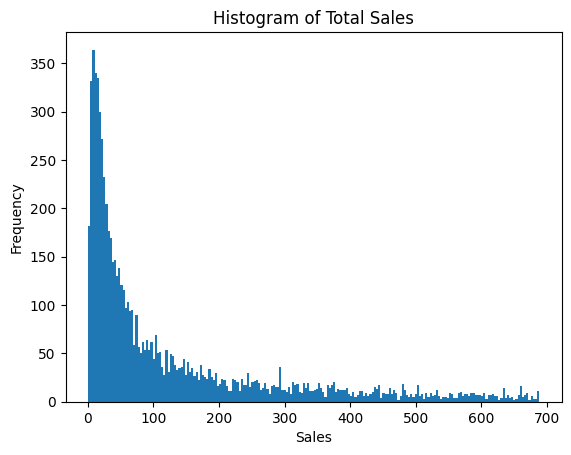

In [ ]:
plt.hist(df_total_sales_filtered['Sales'], bins=210)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Total Sales')
plt.show()

<ipython-input-38-e07b9ec9c457>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Sales', data=df_total_sales_filtered, palette="cubehelix")


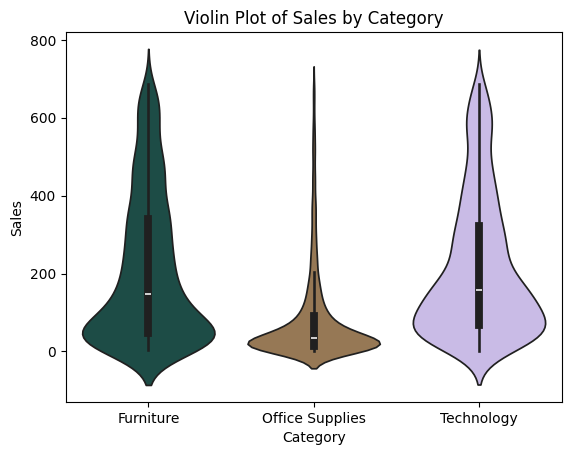

In [ ]:
sns.violinplot(x='Category', y='Sales', data=df_total_sales_filtered, palette="cubehelix")
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Violin Plot of Sales by Category')
plt.show()

Furniture and Technology categories have higher sales variability compared to Office Supplies, which is more consistent but has lower sales values.

The same procedures but for profits

In [ ]:
#cleaning outliers
profit_list = list(df_total["Profit"])
sorted_profit_list = sorted(profit_list, reverse=True)
print(sorted_profit_list)

[91585.94, 8425.18, 6921.58, 4961.21, 4736.98, 4448.46, 3224.15, 3120.63, 2808.38, 2669.08, 2599.73, 2579.35, 2408.17, 2373.08, 2291.51, 2072.65, 2041.9, 1983.52, 1779.39, 1718.25, 1649.22, 1601.45, 1560.32, 1496.72, 1483.18, 1463.58, 1421.38, 1420.97, 1419.68, 1418.38, 1403.54, 1305.85, 1302.7, 1256.43, 1224.98, 1163.47, 1123.36, 1085.99, 1081.48, 1078.49, 1067.06, 1029.05, 971.1, 947.82, 947.82, 930.91, 907.99, 902.68, 865.19, 862.56, 855.21, 850.65, 845.7, 842.76, 817.53, 810.49, 787.31, 786.19, 780.13, 779.76, 774.75, 764.91, 763.58, 759.71, 755.89, 754.22, 754.02, 743.27, 724.47, 718.13, 703.08, 702.99, 700.4, 696.59, 689.38, 680.38, 679.78, 676.67, 674.4, 661.96, 658.79, 655.26, 643.15, 640.63, 639.36, 639.22, 639.22, 637.91, 637.4, 630.9, 629.99, 620.03, 594.57, 593.89, 591.51, 587.75, 587.31, 587.09, 583.98, 562.54, 555.42, 554.38, 554.34, 551.98, 551.9, 546.05, 539.42, 537.5, 529.57, 529.19, 529.15, 526.55, 519.84, 515.37, 508.21, 507.48, 505.15, 505.14, 498.46, 495.01, 492.54

In [ ]:
df_total= df_total[df_total['Profit'] != 91585.94]

In [ ]:
print(df_total[df_total["Profit"]<-2000])

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
1928  2021-169019 2021-07-27 2021-07-31  Standard Class    LF-17185   
1998  2022-150630 2022-09-18 2022-09-22  Standard Class    TB-21520   
2666  2022-147830 2022-12-16 2022-12-19     First Class    NF-18385   
4019  2022-116638 2022-01-29 2022-02-01    Second Class    JH-15985   
6094  2023-108196 2023-11-27 2023-12-04  Standard Class    CS-12505   
7128  2024-134845 2024-04-18 2024-04-24  Standard Class    SR-20425   

        Customer Name      Segment        Country          City  \
1928    Luke Phillips     Consumer  United States   San Antonio   
1998       Tracy Ross     Consumer  United States  Philadelphia   
2666    Natalie Scott     Consumer  United States        Newark   
4019   Joseph Vasquez     Consumer  United States       Concord   
6094       Cindy Hall     Consumer  United States     Lancaster   
7128  Sharelle Howard  Home Office  United States    Louisville   

               State  ...       

In [ ]:
# Calculate the first and third quartiles of the 'Profit' column
q1 = df_total['Profit'].quantile(0.25)
q3 = df_total['Profit'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the DataFrame to remove outliers based on the IQR
df_total_profit_filtered = df_total[(df_total['Profit'] >= lower_bound) & (df_total['Profit'] <= upper_bound)]

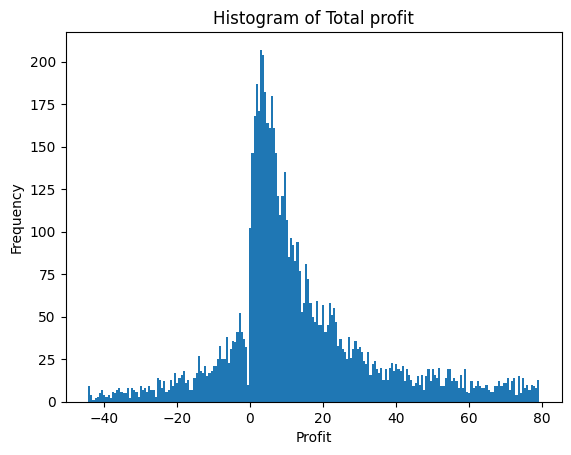

In [ ]:

plt.hist(df_total_profit_filtered['Profit'], bins=210)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Total profit')
plt.show()

<ipython-input-44-0f9f6d62732c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Profit', data=df_total_profit_filtered, palette="cubehelix")


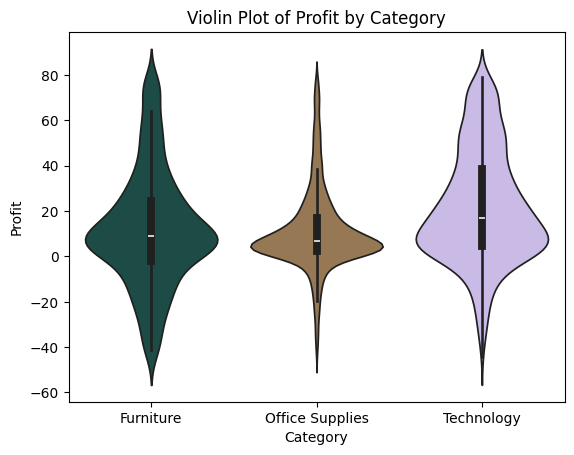

In [ ]:
sns.violinplot(x='Category', y='Profit', data=df_total_profit_filtered, palette="cubehelix")
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Violin Plot of Profit by Category')
plt.show()

 Furniture shows a wide range of profit outcomes, including both high profits and losses, while Office Supplies is more stable, and Technology offers high profits with moderate variability.

In [ ]:
# we also add a new subset of data for statistical analysis to calculate only based on first 8 months to ba able to calculate also the last year
# Filter the data to include only entries from the first 8 months (January to August)
df_total_first8 = df_total[df_total['Month'] <= 8]

# look for patterns


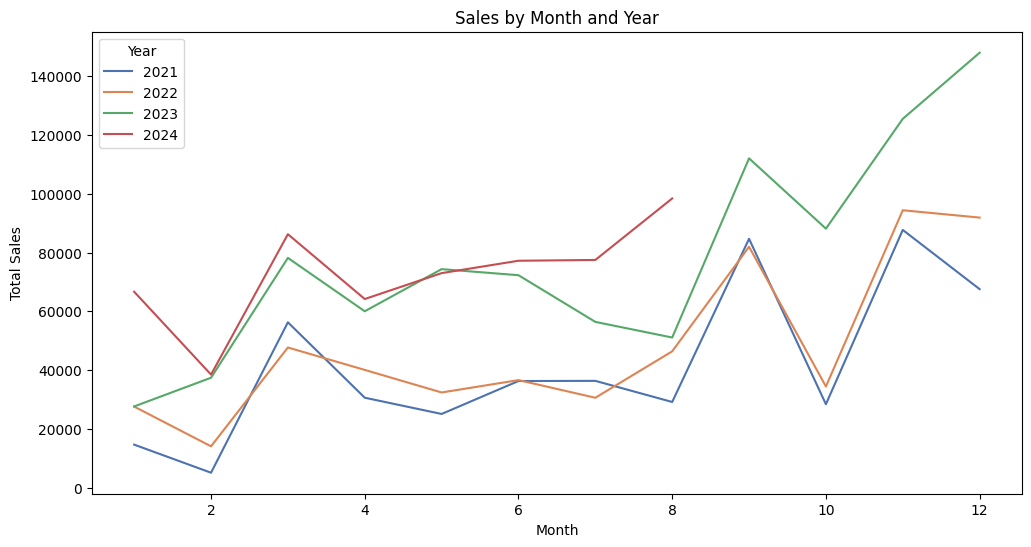

In [ ]:
category_sales = df_total.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=category_sales, palette='deep')
plt.title('Sales by Month and Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.show()

Looking at the graph above, we can see an overall growth across all years at the end of the year. This could be due to seasonal factors, holiday sales or end of the year promotions. There are also consistent peaks around March, telling us this month is also critical for sales. Overall, there is an anual increase in sales from years 2021 through 2024 with each year showing higher monthly sales compared to the corresponding months in previous years, indicating positive growth.

In [ ]:
df_total.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,profit_margin
0,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,51.16,7,0.0,14.50,2021,6,-36.66
1,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,...,Office Supplies,Art,Newell 322,7.62,4,0.0,2.01,2021,6,-5.61
2,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,...,Technology,Phones,Mitel 5320 IP Phone VoIP phone,949.79,6,0.2,92.80,2021,6,-856.99
3,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,...,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,19.37,3,0.2,5.92,2021,6,-13.45
4,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,...,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,120.30,5,0.0,35.26,2021,6,-85.04


In [ ]:
# Set 'Order Date' as the index
df_total.set_index('Order Date', inplace=True)


<ipython-input-49-d7cbb4455f66>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_total_months = df_total['Sales'].resample('M').sum()


<Figure size 1200x800 with 0 Axes>

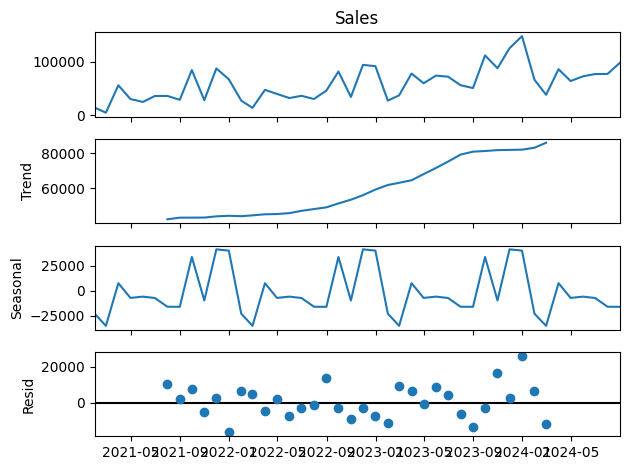

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample by month to get total sales per month
df_total_months = df_total['Sales'].resample('M').sum()

# Step 3: Perform seasonal decomposition
result = seasonal_decompose(df_total_months, model='additive', period=12)

# Step 4: Plot the decomposition
plt.figure(figsize=(12, 8))
result.plot()
plt.show()

From this decomposition for sales visual, we are able to recieve useful data to help us forecast future sales, as it allows for adjusting for seasonal effects and observing the underlying growth. Overall, the graph shows a steady increase for trend which tells us that the sales have been growing over time, the seasonal graph shows us that the periodic fluctuations are most likely due to seasonal factors, and the residuals are mostly balanced around zero meaning the decompositions fits the data well with minimal unexplained variations.

# Do linear regression for sales

## creating the model for general trend

In [ ]:
from sklearn.linear_model  import LinearRegression as lm
from sklearn.svm import SVC as SVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
monthly_sales = df_total.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Create a 'Time' column representing the sequential order of months
monthly_sales['Time'] = range(1, len(monthly_sales) + 1)
# Now use 'Time' as the independent variable
X = monthly_sales['Time'].values.reshape(-1, 1)  # Reshape for sklearn
y_sal = monthly_sales['Sales'].values


In [ ]:
#train test split for general trends
X_train, X_test, y_trainy_sal, y_testy_sal = train_test_split(X, y_sal, test_size=0.2, random_state=42, shuffle=True)


In [ ]:
# Dictionary to store results for each category
category_data = {}

# Loop through each unique category in 'Category'
for category in df_total['Category'].unique():
    # Filter data for the current category
    category_df = df_total[df_total['Category'] == category]

    # Aggregate sales and profit by year and month for the current category
    monthly_sales = category_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
    monthly_profit = category_df.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

    # Extract features (Year, Month) and target variables (Sales, Profit)
    X = monthly_sales[['Year', 'Month']].values
    y_sales = monthly_sales['Sales'].values
    y_profit = monthly_profit['Profit'].values


    #train test split
    X_train, X_test, y_train_sal, y_test_sal = train_test_split(X, y_sales, test_size=0.2, random_state=42, shuffle=True)
    X_train, X_test, y_train_prof, y_test_prof = train_test_split(X, y_profit, test_size=0.2, random_state=42, shuffle=True)

    # Store results for the category in the dictionary
    category_data[category] = {
        'X': X,
        'y_sales': y_sales,
        'y_profit': y_profit,
        'X_train': X_train,
        'X_test': X_test,
        'y_train_sal': y_train_sal,
        'y_test_sal': y_test_sal,
        'y_train_prof': y_train_prof,
        'y_test_prof': y_test_prof
    }

In [ ]:
#checking the data if it's actually splitted
category_data['Furniture']['y_train_sal'] ==category_data['Technology']['y_train_sal']

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [ ]:
# now we train the models for general trend
from sklearn import tree
model1 = lm()
model2 = tree.DecisionTreeRegressor( max_leaf_nodes= 7)

In [ ]:
#train and test for sales two models
categ_sal_models = {}

#for categories
for category, data in category_data.items():

  # Initialize new models for each category
  model1 = lm()
  model2 = tree.DecisionTreeRegressor( max_leaf_nodes= 7, random_state=2)

  # Train the models
  model1.fit(data['X_train'], data['y_train_sal'])
  model2.fit(data['X_train'], data['y_train_sal'])

  # Make predictions for the test set
  y_test_pred_lr = model1.predict(data['X_test'])
  y_test_pred_trees = model2.predict(data['X_test'])

  #evaluation of the models by category  (and predictions inside)
  rmse1 = np.sqrt(mean_squared_error(data['y_test_sal'], y_test_pred_lr))
  r2_1 = r2_score(data['y_test_sal'], y_test_pred_lr)
  print("Root Mean Squared Error for linear regression for cagetory ",str(category), " is: ", rmse1)
  print("R-squared for linear regression  for cagetory ",str(category), " is: " , r2_1)


  rmse2 = np.sqrt(mean_squared_error(data['y_test_sal'], y_test_pred_trees))
  r2_2 = r2_score(data['y_test_sal'], y_test_pred_trees)
  print("Root Mean Squared Error for Decision Tree for cagetory ",str(category), " is: " , rmse2)
  print("R-squared for Decision Tree for category ",str(category), " is: " , r2_2, "\n")


  # Add models, metrics, and predictions to the dictionary for each category
  categ_sal_models[category] = {
        'lr': model1,
        'trees': model2,
        'rmse1': rmse1,
        'r2_1': r2_1,
        'rmse2': rmse2,
        'r2_2': r2_2,
        'y_test_pred_lr': y_test_pred_lr,
        'y_test_pred_trees': y_test_pred_trees
  }


model1 = lm()
model2 = tree.DecisionTreeRegressor( max_leaf_nodes= 7, random_state=2)
# general
model1.fit(X_train, y_trainy_sal)
model2.fit(X_train, y_trainy_sal)

#predictions
y_testy_sal_pred1 = model1.predict(X_test)
y_testy_sal_pred2 = model2.predict(X_test)

#Evaluations
rmse1 = np.sqrt(mean_squared_error(y_testy_sal, y_testy_sal_pred1))
r2_1 = r2_score(y_testy_sal, y_testy_sal_pred1)
print("Root Mean Squared Error for linear regression general:", rmse1)
print("R-squared for linear regression general:", r2_1)

rmse2 = np.sqrt(mean_squared_error(y_testy_sal, y_testy_sal_pred2))
r2_2 = r2_score(y_testy_sal, y_testy_sal_pred2)
print("Root Mean Squared Error for Decision Tree general:", rmse2)
print("R-squared for Decision Tree general:", r2_2, "\n")



Root Mean Squared Error for linear regression for cagetory  Furniture  is:  8483.438436827437
R-squared for linear regression  for cagetory  Furniture  is:  0.6092359025717069
Root Mean Squared Error for Decision Tree for cagetory  Furniture  is:  8498.737349796373
R-squared for Decision Tree for category  Furniture  is:  0.6078252348282851 

Root Mean Squared Error for linear regression for cagetory  Office Supplies  is:  7997.512592441559
R-squared for linear regression  for cagetory  Office Supplies  is:  0.49511465965691903
Root Mean Squared Error for Decision Tree for cagetory  Office Supplies  is:  9589.15380065402
R-squared for Decision Tree for category  Office Supplies  is:  0.2741557105057174 

Root Mean Squared Error for linear regression for cagetory  Technology  is:  9138.039645155348
R-squared for linear regression  for cagetory  Technology  is:  0.2791428204715638
Root Mean Squared Error for Decision Tree for cagetory  Technology  is:  17467.452843578692
R-squared for De

From the results shown above we can identify that for Furniture, linear regression is performing slightly better in this category with a lower RMSE and a higher R2. We see the Linear Regression also performs better for Office Supplies, the decision trees R2 of 0.14 indicates it does not explain the variance will, making it a poor fit for this category and linear regression does a better job with nearly 50% explained variance. Looking at the results for Technology, we see the linear regression model outperforms the decison tree again and the negative R2 for the decision tree indicates it performs worse than a horizontal line model, implying extreme overfitting or poor alignment with the data.

Overall, Linear Regression consistently outperforms the Decision Tree model across all categories and in the general data set. For this reason, we believe that data structure is better suited to a linear relationship. The decision tree struggle is probably becuse of overfitting or sensitivity to noise in the dataset.

Table for Sales RMSE and R2 values to compare them easier.

In [ ]:
import pandas as pd

# Define the data for each model, category, RMSE, and R²
data = [
    {"Model": "Linear Regression", "Category": "Furniture", "RMSE": 8483.44, "R²": 0.6092},
    {"Model": "Decision Tree", "Category": "Furniture", "RMSE": 8498.74, "R²": 0.6078},

    {"Model": "Linear Regression", "Category": "Office Supplies", "RMSE": 7997.51, "R²": 0.4951},
    {"Model": "Decision Tree", "Category": "Office Supplies", "RMSE": 9589.15, "R²": 0.2742},

    {"Model": "Linear Regression", "Category": "Technology", "RMSE": 9138.04, "R²": 0.2791},
    {"Model": "Decision Tree", "Category": "Technology", "RMSE": 17467.45, "R²": -1.6339},

    {"Model": "Linear Regression", "Category": "General", "RMSE": 18831.18, "R²": 0.6564},
    {"Model": "Decision Tree", "Category": "General", "RMSE": 28595.00, "R²": 0.2077},
]

# Create a DataFrame from the data
results_df = pd.DataFrame(data)

# Display the table
print(results_df)


               Model         Category      RMSE      R²
0  Linear Regression        Furniture   8483.44  0.6092
1      Decision Tree        Furniture   8498.74  0.6078
2  Linear Regression  Office Supplies   7997.51  0.4951
3      Decision Tree  Office Supplies   9589.15  0.2742
4  Linear Regression       Technology   9138.04  0.2791
5      Decision Tree       Technology  17467.45 -1.6339
6  Linear Regression          General  18831.18  0.6564
7      Decision Tree          General  28595.00  0.2077


In [ ]:
#checking the data if it's actually splitted
categ_sal_models['Furniture']['trees'] ==categ_sal_models['Technology']['trees']

False

Now plot the model as a linear regression as a line on the plot and the total sales per month as points


In [ ]:
from sklearn.linear_model import LinearRegression as lm
import matplotlib.dates as mdates

# Fit the model on the entire dataset
model_full_sal = lm()
model_full_sal.fit(X, y_sal)
y_sal_pred_full = model_full_sal.predict(X)  # Predict for the entire X range

model_full_sal2 = tree.DecisionTreeRegressor( max_leaf_nodes= 7, random_state=2)
model_full_sal2.fit(X, y_sal)
y_sal_pred_full2 = model_full_sal2.predict(X)  # Predict for the entire X range

months = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))


## Prediction of future months

In [ ]:
future_months = [[2024,9],[2024,10],[2024,11],[2024, 12]]
future_sales_lr_general = model1.predict(future_months)
future_sales_trees_general = model2.predict(future_months)

#Create a dataframe

linear_projection_df = pd.DataFrame ({
    'Year': [2024,2024,2024,2024],
    'Month': [9,10,11,12],
    'Projected Sales lr': future_sales_lr_general,
    'Projected Sales trees': future_sales_trees_general
})

#Display the series
print(linear_projection_df)

   Year  Month  Projected Sales lr  Projected Sales trees
0  2024      9       102718.092622             100114.895
1  2024     10       108128.137811             100114.895
2  2024     11       113538.182999             100114.895
3  2024     12       118948.228188             148049.360


Table for projected RMSE and R2 to compare better.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Data preparation
data = {
    'Year': [2024, 2024, 2024, 2024],
    'Month': [9, 10, 11, 12],
    'Projected Sales lr': [102718.092622, 108128.137811, 113538.182999, 118948.228188],
    'Projected Sales trees': [100114.895, 100114.895, 100114.895, 148049.360]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define the actual and predicted values
y_actual = df['Projected Sales trees']
y_predicted = df['Projected Sales lr']

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))

# Calculate R²
r2 = r2_score(y_actual, y_predicted)

# Prepare the results as a DataFrame
results_df = pd.DataFrame({
    'Year': df['Year'],
    'Month': df['Month'],
    'RMSE': [rmse] * len(df),  # Same RMSE value for all rows
    'R-squared': [r2] * len(df)  # Same R² value for all rows
})

# Display the results table
print(results_df)

   Year  Month          RMSE  R-squared
0  2024      9  16568.412957   0.362816
1  2024     10  16568.412957   0.362816
2  2024     11  16568.412957   0.362816
3  2024     12  16568.412957   0.362816


R² and RSME is the same for all rows because it is computed for the entire set of actual vs. predicted values, which represent the overall performance of the model.

## build the linear regression model

In [ ]:
#printing the linear regression model equation

print("Linear regression Equation: ")
print(f"Sales = {model1.coef_[0]:.2f} *Year + {model1.coef_[1]:.2f} * Month + {model1.intercept_:.2f}")


Linear regression Equation: 
Sales = 17463.35 *Year + 5410.05 * Month + -35291784.63


Checking if the model is working

In [ ]:
17464.39*2023 + 5409.64*5 -35293892.54
# actual sale: 74358.81

63616.63000000268

In [ ]:
17464.39*2021 + 5409.64*9 -35293892.54
# actual sale:  84683.73

50326.409999996424

In [ ]:
17464.39*2024 + 5409.64*11 -35293892.54
# predictied sale:   113538.182999

113538.8599999994

## for each category

In [ ]:
# Define the future months for prediction
future_months = np.array([[2024, 9], [2024, 10], [2024, 11], [2024, 12]])

# Initialize an empty list to store each category's projections
all_projections = []

# Loop through each category in category_data
for category in category_data.keys():
    # Get the sales models for the current category
    current_model_s_lr = categ_sal_models[category]['lr']
    current_model_s_trees = categ_sal_models[category]['trees']

    # Predict future sales using both models
    future_sales_lr = current_model_s_lr.predict(future_months)
    future_sales_trees = current_model_s_trees.predict(future_months)

    # Create a DataFrame for the current category
    category_projection_df = pd.DataFrame({
        'Category': [category] * 4,  # Repeat the category for each month
        'Year': [2024] * 4,
        'Month': [9, 10, 11, 12],
        'Projected Sales lr': future_sales_lr,
        'Projected Sales trees': future_sales_trees
    })

    # Append the DataFrame to the list
    all_projections.append(category_projection_df)

# Concatenate all projections into a single DataFrame
linear_projection_df_s = pd.concat(all_projections, ignore_index=True)

# Display the combined projections DataFrame
linear_projection_df_s


,Category,Year,Month,Projected Sales lr,Projected Sales trees
0,Furniture,2024,9,31588.308955,24248.975
1,Furniture,2024,10,33878.762216,24248.975
2,Furniture,2024,11,36169.215477,56824.390
3,Furniture,2024,12,38459.668738,56824.390
4,Office Supplies,2024,9,32850.931333,47957.030
5,Office Supplies,2024,10,34519.396304,47957.030
6,Office Supplies,2024,11,36187.861275,47957.030
7,Office Supplies,2024,12,37856.326246,57389.050
8,Technology,2024,9,38278.852334,27695.481
9,Technology,2024,10,39729.979291,41886.625


Projected Future Trends (2024)

Sales Projections:

Linear regression predicts steady growth across categories.

Decision tree shows more variability but anticipates higher sales spikes, especially in Furniture.

Overall, sales for Technology and Office Supplies are expected to remain strong, while Furniture could experience significant but irregular growth.

# Profit ones

In [ ]:
monthly_profit = df_total.groupby(['Year', 'Month'])['Profit'].sum().reset_index()
# Create a 'Time' column representing the sequential order of months
monthly_profit['Time'] = range(1, len(monthly_profit) + 1)
# x is the same for sales and profit so we make only nex y variable
y_prof = monthly_profit['Profit'].values

X_train, X_test, y_trainy_prof, y_testy_prof = train_test_split(X, y_prof, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# Train and test for profits two models
categ_prof_models = {}

# For each category
for category, data in category_data.items():

    # Initialize new models for each category
    model1p = lm()
    model2p = tree.DecisionTreeRegressor(max_leaf_nodes=5, random_state=23)

    # Fit the models
    model1p.fit(data['X_train'], data['y_train_prof'])
    model2p.fit(data['X_train'], data['y_train_prof'])

    # Predictions for the test data
    y_test_prof_pred_lr = model1p.predict(data['X_test'])
    y_test_prof_pred_tree = model2p.predict(data['X_test'])

    # Evaluation of the models by category
    rmse1 = np.sqrt(mean_squared_error(data['y_test_prof'], y_test_prof_pred_lr))
    r2_1 = r2_score(data['y_test_prof'], y_test_prof_pred_lr)
    print(f"Root Mean Squared Error for linear regression for category {category} is: {rmse1}")
    print(f"R-squared for linear regression for category {category} is: {r2_1}")

    rmse2 = np.sqrt(mean_squared_error(data['y_test_prof'], y_test_prof_pred_tree))
    r2_2 = r2_score(data['y_test_prof'], y_test_prof_pred_tree)
    print(f"Root Mean Squared Error for Decision Tree for category {category} is: {rmse2}")
    print(f"R-squared for Decision Tree for category {category} is: {r2_2}\n")

    # Store models and predictions in the dictionary
    categ_prof_models[category] = {
        'lr': model1p,
        'trees': model2p,
        'rmse1': rmse1,
        'r2_1': r2_1,
        'rmse2': rmse2,
        'r2_2': r2_2,
        'y_test_prof_pred_lr': y_test_prof_pred_lr,  # Store the linear regression predictions
        'y_test_prof_pred_tree': y_test_prof_pred_tree  # Store the decision tree predictions
    }

# General model for profit prediction
model1p = lm()
model2p = tree.DecisionTreeRegressor(max_leaf_nodes=5, random_state=23)

# Fit the general model
model1p.fit(X_train, y_trainy_prof)
model2p.fit(X_train, y_trainy_prof)

# Predictions for the test data
y_testy_prof_pred1 = model1p.predict(X_test)
y_testy_prof_pred2 = model2p.predict(X_test)

# Evaluations
rmse1 = np.sqrt(mean_squared_error(y_testy_prof, y_testy_prof_pred1))
r2_1 = r2_score(y_testy_prof, y_testy_prof_pred1)
print(f"Root Mean Squared Error for linear regression general: {rmse1}")
print(f"R-squared for linear regression general: {r2_1}")

rmse2 = np.sqrt(mean_squared_error(y_testy_prof, y_testy_prof_pred2))
r2_2 = r2_score(y_testy_prof, y_testy_prof_pred2)
print(f"Root Mean Squared Error for Decision Tree general: {rmse2}")
print(f"R-squared for Decision Tree general: {r2_2}\n")


Root Mean Squared Error for linear regression for category Furniture is: 1432.9024746158657
R-squared for linear regression for category Furniture is: 0.06822466271017824
Root Mean Squared Error for Decision Tree for category Furniture is: 1804.0265807544365
R-squared for Decision Tree for category Furniture is: -0.47694325616912714

Root Mean Squared Error for linear regression for category Office Supplies is: 1616.660518645509
R-squared for linear regression for category Office Supplies is: 0.2276837815591377
Root Mean Squared Error for Decision Tree for category Office Supplies is: 3079.7528293649425
R-squared for Decision Tree for category Office Supplies is: -1.8027813317609422

Root Mean Squared Error for linear regression for category Technology is: 2954.490079563689
R-squared for linear regression for category Technology is: -1.9751197070534228
Root Mean Squared Error for Decision Tree for category Technology is: 3790.1189474793773
R-squared for Decision Tree for category Techn

From the results we recieved above, we are going to focus mainly on the values for the 'Root Mean Squared Error for linear regression' values as they have given us better results than the 'R-squared for Decision' for each category. Which is fine because the Root Mean Squared Error for linear regression provides us with the average difference between values predicted by the model and the actual values. Across all categories, linear regression has a lower RMSE and a slightly better R-squared than the decison tree however, the value is still negative. Overall, the results suggest that both models are having difficulty to generalize to the enire dataset.

Table for Profit RMSE and R2 values to compare them better.

In [ ]:
import pandas as pd

# Define the data for each model, category, RMSE, and R²
data = [
    {"Model": "Linear Regression", "Category": "Furniture", "RMSE": 1432.90, "R²": 0.0682},
    {"Model": "Decision Tree", "Category": "Furniture", "RMSE": 1804.03, "R²": -0.4769},

    {"Model": "Linear Regression", "Category": "Office Supplies", "RMSE": 1616.66, "R²": 0.2277},
    {"Model": "Decision Tree", "Category": "Office Supplies", "RMSE": 3079.75, "R²": -1.8028},

    {"Model": "Linear Regression", "Category": "Technology", "RMSE": 2954.49, "R²": -1.9751},
    {"Model": "Decision Tree", "Category": "Technology", "RMSE": 3790.12, "R²": -3.8960},

    {"Model": "Linear Regression", "Category": "General", "RMSE": 3314.84, "R²": -0.0075},
    {"Model": "Decision Tree", "Category": "General", "RMSE": 5181.95, "R²": -1.4621},
]

# Create a DataFrame from the data
results_df = pd.DataFrame(data)

# Display the table
print(results_df)


               Model         Category     RMSE      R²
0  Linear Regression        Furniture  1432.90  0.0682
1      Decision Tree        Furniture  1804.03 -0.4769
2  Linear Regression  Office Supplies  1616.66  0.2277
3      Decision Tree  Office Supplies  3079.75 -1.8028
4  Linear Regression       Technology  2954.49 -1.9751
5      Decision Tree       Technology  3790.12 -3.8960
6  Linear Regression          General  3314.84 -0.0075
7      Decision Tree          General  5181.95 -1.4621


In [ ]:
# Fit the model on the entire dataset
model_fullp = lm()
model_fullp.fit(X, y_prof)
y_prof_pred_full = model_fullp.predict(X)


model_full2p = tree.DecisionTreeRegressor( max_leaf_nodes= 5, random_state=23)
model_full2p.fit(X, y_prof)
y_prof_pred_full2 = model_full2p.predict(X)  # Predict for the entire X range

months = pd.to_datetime(monthly_profit[['Year', 'Month']].assign(DAY=1))


In [ ]:
future_months = [[2024,9],[2024,10],[2024,11],[2024, 12]]
future_prof_lr_general = model1p.predict(future_months)
future_prof_trees_general = model2p.predict(future_months)

#Create a dataframe

linear_projection_df_p = pd.DataFrame ({
    'Year': [2024,2024,2024,2024],
    'Month': [9,10,11,12],
    'Projected profit lr': future_prof_lr_general,
    'Projected profit trees': future_prof_trees_general
})

#Display the series
print(linear_projection_df_p)

   Year  Month  Projected profit lr  Projected profit trees
0  2024      9         11135.176442            10009.010000
1  2024     10         11886.909942            10009.010000
2  2024     11         12638.643441            15511.443333
3  2024     12         13390.376940            15511.443333


## Building regression model for profits

In [ ]:
#printing the linear regression model equation for profits

print("Linear regression Equation: ")
print(f"Sales = {model1p.coef_[0]:.2f} *Year + {model1p.coef_[1]:.2f} Month + {model1p.intercept_:.2f}")

Linear regression Equation: 
Sales = 1475.33 *Year + 751.73 Month + -2981698.30


In [ ]:
# Initialize an empty list to store each category's projections
all_projections_p = []

# Loop through each category in category_data
for category in category_data.keys():
    # Get the sales models for the current category
    current_model_p_lr = categ_prof_models[category]['lr']
    current_model_p_trees = categ_prof_models[category]['trees']

    # Predict future sales using both models
    future_prof_lr = current_model_p_lr.predict(future_months)
    future_prof_trees = current_model_p_trees.predict(future_months)

    # Create a DataFrame for the current category
    category_projection_df_p = pd.DataFrame({
        'Category': [category] * 4,  # Repeat the category for each month
        'Year': [2024] * 4,
        'Month': [9, 10, 11, 12],
        'Projected Profits lr': future_prof_lr,
        'Projected Profits trees': future_prof_trees
    })

    # Append the DataFrame to the list
    all_projections_p.append(category_projection_df_p)

# Concatenate all projections into a single DataFrame
linear_projection_df_p = pd.concat(all_projections_p, ignore_index=True)

# Display the combined projections DataFrame
linear_projection_df_p


,Category,Year,Month,Projected Profits lr,Projected Profits trees
0,Furniture,2024,9,845.051215,384.655667
1,Furniture,2024,10,916.734821,384.655667
2,Furniture,2024,11,988.418427,4107.970000
3,Furniture,2024,12,1060.102033,1661.120000
4,Office Supplies,2024,9,4579.907103,3651.618000
5,Office Supplies,2024,10,4860.830500,3651.618000
6,Office Supplies,2024,11,5141.753897,11356.090000
7,Office Supplies,2024,12,5422.677295,11356.090000
8,Technology,2024,9,5710.218125,6685.558571
9,Technology,2024,10,6109.344620,6685.558571


Projected Future Trends (2024)

Profit Projections:

Technology maintains its lead as the most profitable category.

Office Supplies show a promising increase in profitability.

Furniture remains volatile, requiring close monitoring.

<ipython-input-75-3e5a06418ab4>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=4, freq='M')


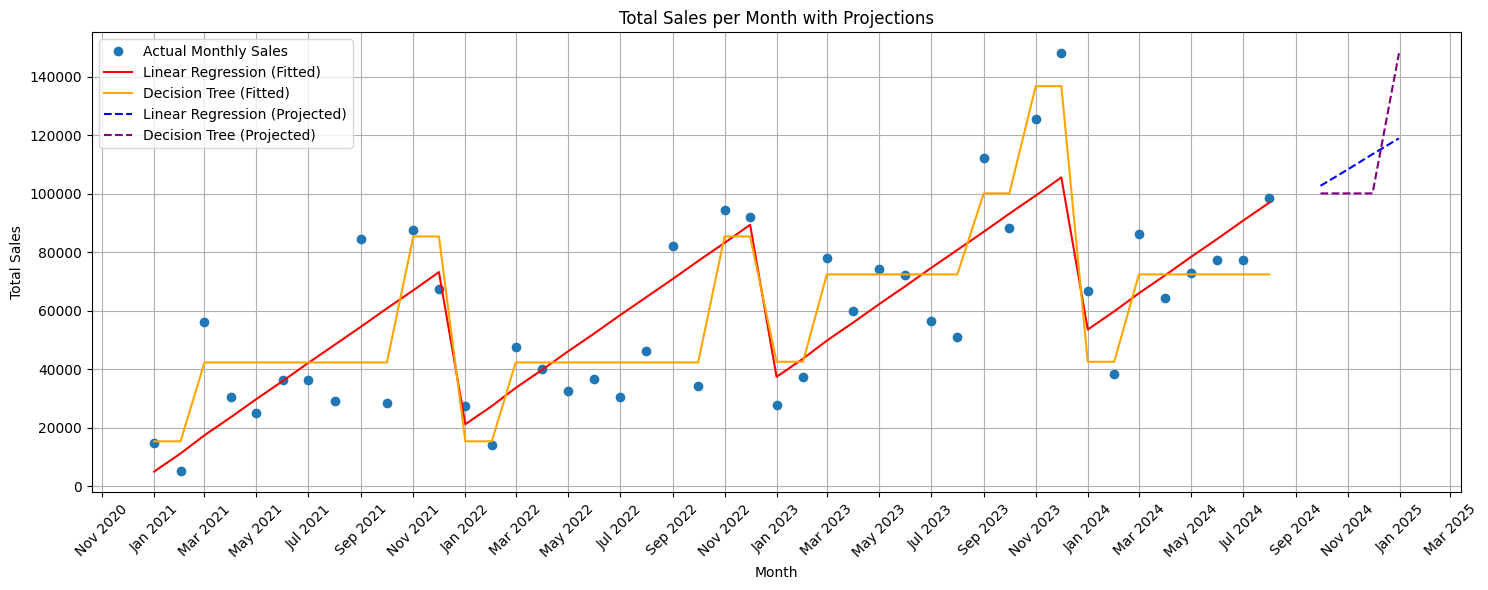

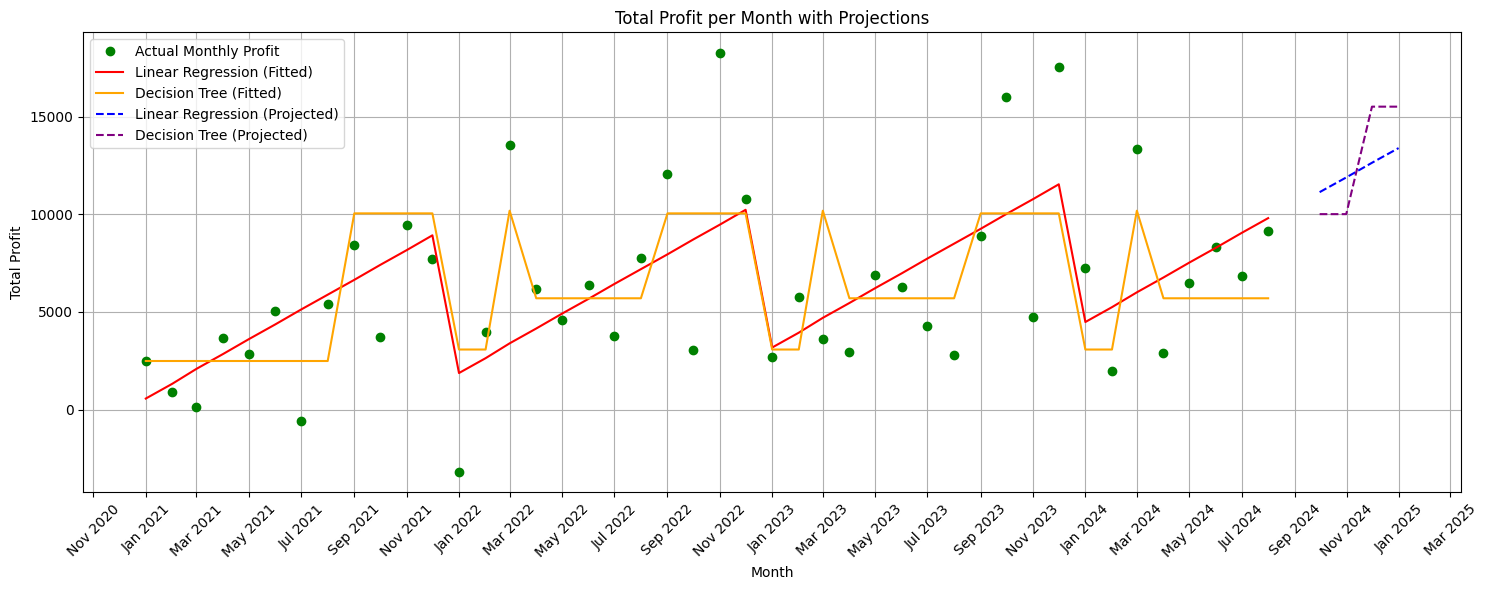

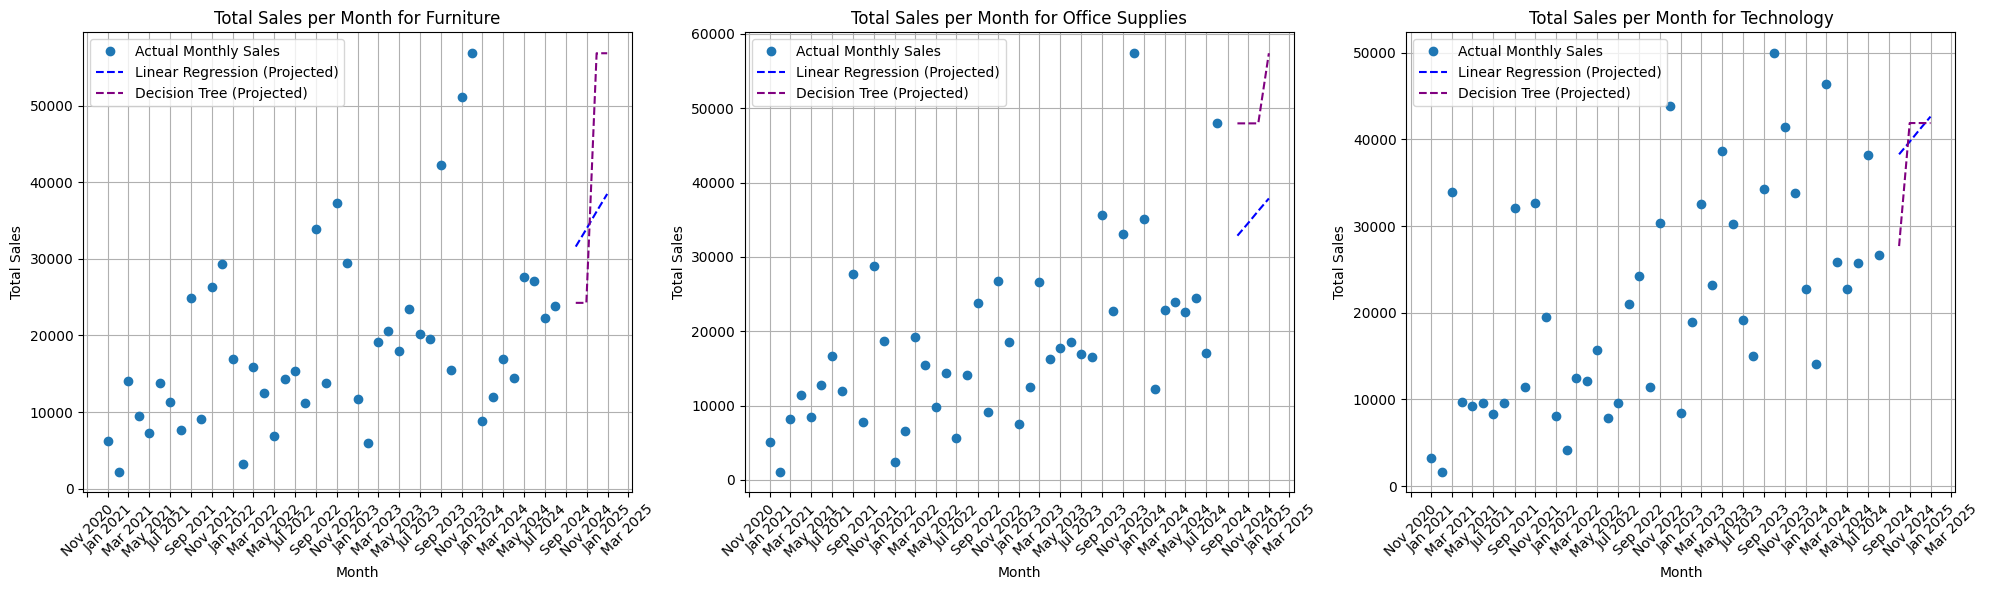

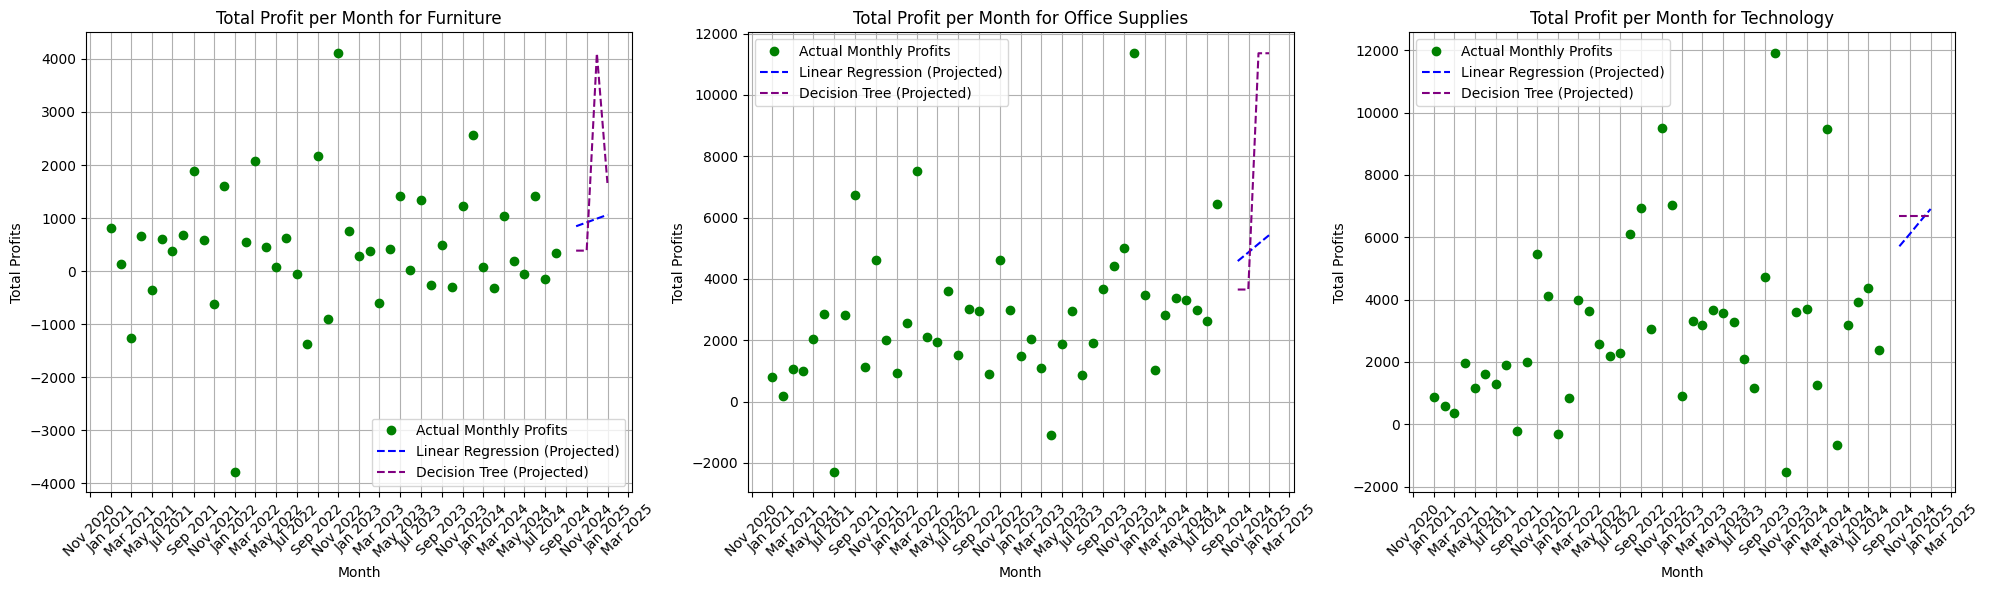

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create future month dates for plotting
last_date = months.max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=4, freq='M')

# Create the plot
plt.figure(figsize=(15, 6))

# Plot actual monthly sales data points
plt.plot(months, y_sal, 'o', label='Actual Monthly Sales')

# Plot the full linear regression line based on all data
plt.plot(months, y_sal_pred_full, color='red', label='Linear Regression (Fitted)')

# Plot the full decision tree regression line based on all data
plt.plot(months, y_sal_pred_full2, color='orange', label='Decision Tree (Fitted)')


# Plot future sales projections
plt.plot(future_dates, future_sales_lr_general, '--', color='blue', label='Linear Regression (Projected)')
plt.plot(future_dates, future_sales_trees_general, '--', color='purple', label='Decision Tree (Projected)')


# Customize plot
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month with Projections')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




# Create the plot
plt.figure(figsize=(15, 6))
# Plot actual monthly sales data points
plt.plot(months, y_prof, 'o', color='green', label='Actual Monthly Profit')

# Plot the full linear regression line based on all data
plt.plot(months, y_prof_pred_full, color='red', label='Linear Regression (Fitted)')

# Plot the full decision tree regression line based on all data
plt.plot(months, y_prof_pred_full2, color='orange', label='Decision Tree (Fitted)')


# Plot future sales projections
plt.plot(future_dates, future_prof_lr_general, '--', color='blue', label='Linear Regression (Projected)')
plt.plot(future_dates, future_prof_trees_general, '--', color='purple', label='Decision Tree (Projected)')


# Customize plot
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Total Profit per Month with Projections')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




# Number of categories
num_categories = len(category_data.keys())

# Create a figure with subplots (1 row, num_categories columns)
fig, axs = plt.subplots(1, num_categories, figsize=(20, 6))

# Loop through each category to create separate plots
for idx, category in enumerate(category_data.keys()):
    # Get actual sales data for the current category
    actual_sales = category_data[category]['y_sales']

    # Get future projections from the DataFrame for the current category
    future_sales_lr = linear_projection_df_s[(linear_projection_df_s['Category'] == category)]['Projected Sales lr'].values
    future_sales_trees = linear_projection_df_s[(linear_projection_df_s['Category'] == category)]['Projected Sales trees'].values

    # Plot actual monthly sales data points
    axs[idx].plot(months, actual_sales, 'o', label='Actual Monthly Sales')

    # Plot future sales projections
    axs[idx].plot(future_dates, future_sales_lr, '--', color='blue', label='Linear Regression (Projected)')
    axs[idx].plot(future_dates, future_sales_trees, '--', color='purple', label='Decision Tree (Projected)')

    # Customize the plot for each category
    axs[idx].set_xlabel('Month')
    axs[idx].set_ylabel('Total Sales')
    axs[idx].set_title(f'Total Sales per Month for {category}')
    axs[idx].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    axs[idx].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    axs[idx].tick_params(axis='x', rotation=45)
    axs[idx].legend()
    axs[idx].grid(True)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()



# Create a figure with subplots (1 row, num_categories columns)
fig, axs = plt.subplots(1, num_categories, figsize=(20, 6))

# Loop through each category to create separate plots
for idx, category in enumerate(category_data.keys()):
    # Get actual profits data for the current category
    actual_profits = category_data[category]['y_profit']

    # Get future projections from the DataFrame for the current category
    future_prof_lr = linear_projection_df_p[(linear_projection_df_p['Category'] == category)]['Projected Profits lr'].values
    future_prof_trees = linear_projection_df_p[(linear_projection_df_p['Category'] == category)]['Projected Profits trees'].values

    # Plot actual monthly profits data points
    axs[idx].plot(months, actual_profits, 'o', color='green', label='Actual Monthly Profits')

    # Plot future profits projections
    axs[idx].plot(future_dates, future_prof_lr, '--', color='blue', label='Linear Regression (Projected)')
    axs[idx].plot(future_dates, future_prof_trees, '--', color='purple', label='Decision Tree (Projected)')

    # Customize the plot for each category
    axs[idx].set_xlabel('Month')
    axs[idx].set_ylabel('Total Profits')
    axs[idx].set_title(f'Total Profit per Month for {category}')
    axs[idx].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    axs[idx].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    axs[idx].tick_params(axis='x', rotation=45)
    axs[idx].legend()
    axs[idx].grid(True)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

##Final observations

Overall patterns and insights

1. Patterns of growth and seasonality.

  The end of every year reliably demonstrates an increase, due to holiday season or end-of-year sales events. This shows the significance of focusing on Q4 with marketing and inventory tactics.

  March demonstrates a regular increase, indicating an important period for sales, which may correspond with seasonal needs or particular promotions.

  There is a noticeable increase in both sales and profits from 2021 to 2024, indicating a general expansion in the business.

Category-Specific Insights

1. Technology:

Sales: Fastest-growing category with consistent increases. It's a strong candidate for investment, given its stability and high sales projections.

Profit: Most profitable and steady. Projections for profits show consistent growth, making it a reliable revenue driver.

Actions: As this category is showing high projections and is already giving steady profit it is the category safest to invest as there is very low risk while doing so. Maybe introducing more technology brands, new models, or some new technology sectors.

2. Furniture:

Sales: Highly volatile but capable of large spikes. Peaks around the end of the year may reflect high-value sales or promotions.

Profit: Significant variability, with periods of loss. The decision tree projects higher potential profits, but the volatility suggests a need for careful inventory and cost management.

Actionable Strategy: Focus on managing risks during low-profit periods and capitalize on spikes through targeted marketing.

3. Office Supplies:

Sales: Stable growth with optimistic projections. While not the fastest-growing, it is dependable.

Profit: Moderate and consistent. Projections show potential for steady increases, especially toward the end of the year.

Actionable Strategy: Leverage its stability by maintaining consistent inventory and investing in incremental growth strategies.


## Business insights


**Investment Focus:**

- Invest heavily in Technology, given its consistent growth and profitability.
  
- Explore targeted campaigns for Furniture to maximize high-sales periods but avoid over-investing due to its volatility.
- Maintain stable support for Office Supplies, which shows consistent performance with steady profits.


**Risk Management:**

- For Furniture, consider strategies like dynamic pricing, targeted promotions, and stock management to mitigate risks during low-demand periods.

Regularly evaluate decision tree predictions to capture sudden sales increases while balancing the conservative outlook of linear regression.

**Seasonal Strategies:**

- Focus efforts on Q4 and March, the most critical periods for both sales and profits.
- Plan promotional campaigns, inventory, and staffing around these peaks to maximize returns.

**Model Utilization:**

- Use linear regression for long-term strategic planning and budgeting.
- Employ decision tree predictions to address short-term fluctuations and spot opportunities for sales spikes or high-profit periods.

# Data Preprocessing (new data)

In [ ]:
# load first data file
df_cust= pd.read_csv("ACME_Customers.csv")
#check how the data looks like
df_cust.head()

,CustomerID,Gender,AgeGroup,CategoryVisited,NumPagesViewed,DeviceUsed,ReferralSource,CartValue,PreferredPaymentMethod,DiscountApplied,DiscountAmount,PurchaseMade,Segment,YearsOfMembership,LoyaltyPoints,LoyaltyTier,State
0,AA-08870,Male,55-64,Furniture,6,Tablet,Direct,264.2371,PayPal,No,0.0,Yes,Home Office,5,1945,Silver,Florida
1,AA-12676,Male,65+,Home Supplies,7,Laptop,Direct,1596.3232,Credit Card,Yes,0.1,No,Home Office,6,1179,Platinum,California
2,AA-17187,Female,18-24,Home Supplies,15,Laptop,Search Engine,1491.0912,PayPal,Yes,0.3,No,Consumer,10,490,Gold,Texas
3,AA-17917,Female,18-24,Technology,4,Mobile,Social Media,177.1260,Debit Card,Yes,0.1,No,Home Office,7,2235,Gold,Ohio
4,AA-20050,Male,65+,Furniture,19,Laptop,Direct,1885.3756,Bank Transfer,No,0.0,Yes,Home Office,3,2844,Silver,Alabama


correlation

In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              20000 non-null  object 
 1   Gender                  20000 non-null  object 
 2   AgeGroup                20000 non-null  object 
 3   CategoryVisited         20000 non-null  object 
 4   NumPagesViewed          20000 non-null  int64  
 5   DeviceUsed              20000 non-null  object 
 6   ReferralSource          20000 non-null  object 
 7   CartValue               20000 non-null  float64
 8   PreferredPaymentMethod  20000 non-null  object 
 9   DiscountApplied         20000 non-null  object 
 10  DiscountAmount          20000 non-null  float64
 11  PurchaseMade            20000 non-null  object 
 12  Segment                 20000 non-null  object 
 13  YearsOfMembership       20000 non-null  int64  
 14  LoyaltyPoints           20000 non-null

In [ ]:
df_cust.groupby('PurchaseMade').describe()

NumPagesViewed                                                    \
                      count       mean       std  min   25%   50%   75%   max   
PurchaseMade                                                                    
No                  11858.0   8.217912  5.339395  1.0   4.0   7.0  12.0  19.0   
Yes                  8142.0  12.728691  4.492110  1.0  11.0  13.0  16.0  19.0   

             CartValue               ... YearsOfMembership        \
                 count         mean  ...               75%   max   
PurchaseMade                         ...                           
No             11858.0  1004.354433  ...               8.0  10.0   
Yes             8142.0  1101.499256  ...               8.0  10.0   

             LoyaltyPoints                                                   \
                     count         mean          std    min     25%     50%   
PurchaseMade                                                                  
No                 11858.0  2302.584500  1347.081936  100.0  1250.0  1948.0   
Yes                 8142.0  2420.023213  1378.663267  100.0  1292.0  2154.0   

                               
                  75%     max  
PurchaseMade                   
No            3415.50  4999.0  
Yes           3630.75  4999.0  

[2 rows x 40 columns]

In [ ]:
 df_cust['CategoryVisited'].unique()

array(['Furniture', 'Home Supplies', 'Technology'], dtype=object)

In [ ]:
# mapping categorical variables into numerical ones
df_cust['PurchaseMade'] = df_cust['PurchaseMade'].map({'Yes': 1, 'No': 0})
df_cust['DiscountApplied'] = df_cust['DiscountApplied'].map({'Yes': 1, 'No': 0})
df_cust['Gender'] = df_cust['Gender'].map({'Male': 1, 'Female': 0})
df_cust['AgeGroup'] = df_cust['AgeGroup'].map({'18-24': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55-64': 4, '65+': 5})
df_cust['CategoryVisited'] = df_cust['CategoryVisited'].map({'Home Supplies': 0, 'Technology': 1, 'Furniture': 2})
df_cust['DeviceUsed'] = df_cust['DeviceUsed'].map({'Desktop': 0, 'Laptop': 1, 'Tablet': 2, 'Mobile': 3})
df_cust['ReferralSource'] = df_cust['ReferralSource'].map({'Direct': 0, 'Email': 1, 'Search Engine': 2, 'Social Media': 3})

df_cust['PreferredPaymentMethod'] = df_cust['PreferredPaymentMethod'].map({'Credit Card': 0, 'Debit Card': 1, 'PayPal': 2,'Bank Transfer': 3})
df_cust['Segment'] = df_cust['Segment'].map({'Consumer': 0, 'Corporate': 1, 'Home Office': 2})
df_cust['LoyaltyTier'] = df_cust['LoyaltyTier'].map({'Bronze': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3})
df_cust['State'] = df_cust['State'].map({'California': 0, 'New York': 1, 'Texas': 2, 'Florida': 3, 'Ohio': 4, 'Alabama': 5})


In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              20000 non-null  object 
 1   Gender                  20000 non-null  int64  
 2   AgeGroup                20000 non-null  int64  
 3   CategoryVisited         20000 non-null  int64  
 4   NumPagesViewed          20000 non-null  int64  
 5   DeviceUsed              20000 non-null  int64  
 6   ReferralSource          20000 non-null  int64  
 7   CartValue               20000 non-null  float64
 8   PreferredPaymentMethod  20000 non-null  int64  
 9   DiscountApplied         20000 non-null  int64  
 10  DiscountAmount          20000 non-null  float64
 11  PurchaseMade            20000 non-null  int64  
 12  Segment                 20000 non-null  int64  
 13  YearsOfMembership       20000 non-null  int64  
 14  LoyaltyPoints           20000 non-null

visualizing

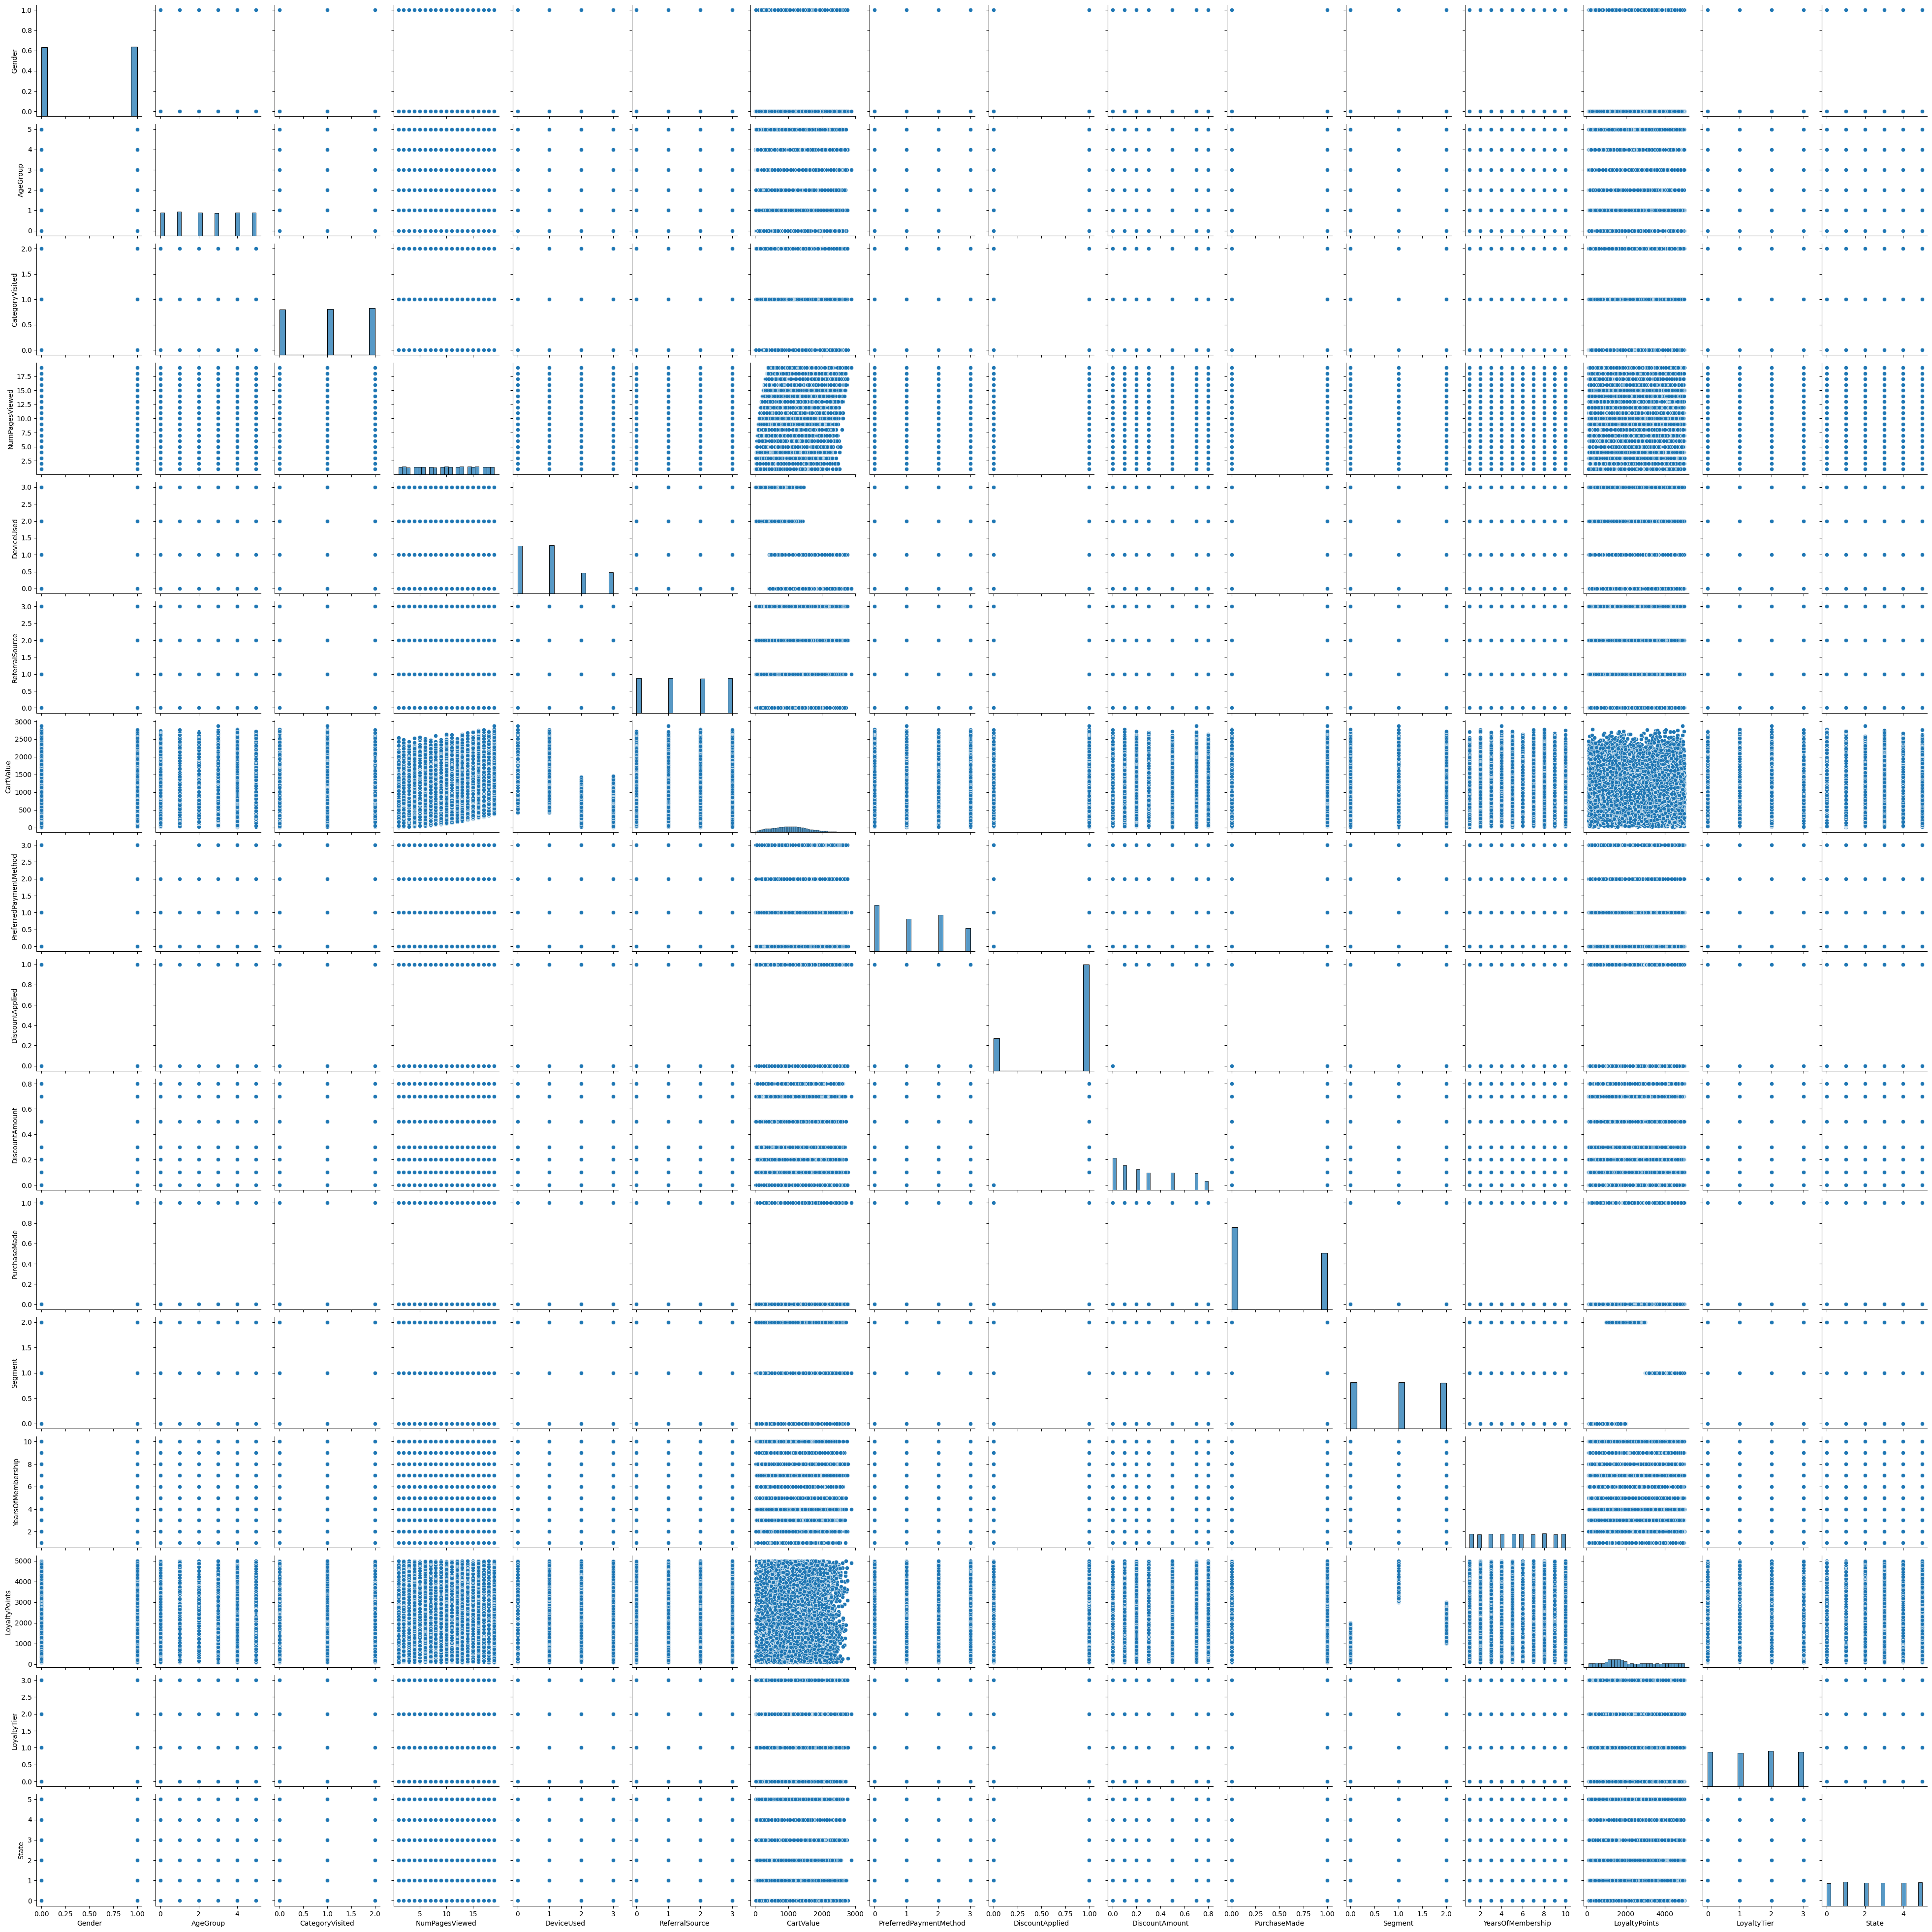

In [ ]:
sns.pairplot(df_cust)

The scatterplot matrix above provides us with a visual overview of pairwise relationships across our set of variables. The strong linear relationships and clustering patterns suggest that some varibles are highly correlated, while others show minimal or no apparent association. The matrix is also useful for detecting outliers and assessing distributional properties, which can be valuable for data preprocesing steps. A few scatterplots have points that are isolated from the main cluster, possibly indicating that there are outliers that do not follow the general pattern of the data. Some scatter plots show curves, indicating that certain variables have non-linear relationships, which could mean that interactions between variables that would require non-linear modeling techniques to capture fully. For our business this is helpful for us to make more data decison driven decisions, uncover more opportunities and otimize our strategic approach.

In [ ]:
# Select all columns except 'CustomerID'
correlation_matrix = df_cust.drop(columns=['CustomerID']).corr()
print(correlation_matrix)


                          Gender  AgeGroup  CategoryVisited  NumPagesViewed  \
Gender                  1.000000 -0.021138        -0.008243        0.006191   
AgeGroup               -0.021138  1.000000        -0.009782        0.005887   
CategoryVisited        -0.008243 -0.009782         1.000000        0.007365   
NumPagesViewed          0.006191  0.005887         0.007365        1.000000   
DeviceUsed              0.007784 -0.003565         0.004640       -0.005257   
ReferralSource          0.005580 -0.007137        -0.009811        0.005265   
CartValue              -0.009241  0.008587        -0.008175        0.228518   
PreferredPaymentMethod -0.007773  0.255849        -0.002740        0.000305   
DiscountApplied        -0.003834  0.002727        -0.009657        0.106631   
DiscountAmount         -0.001317  0.002614         0.000620        0.035799   
PurchaseMade           -0.005109  0.001431        -0.000391        0.404426   
Segment                 0.003262  0.007390        -0

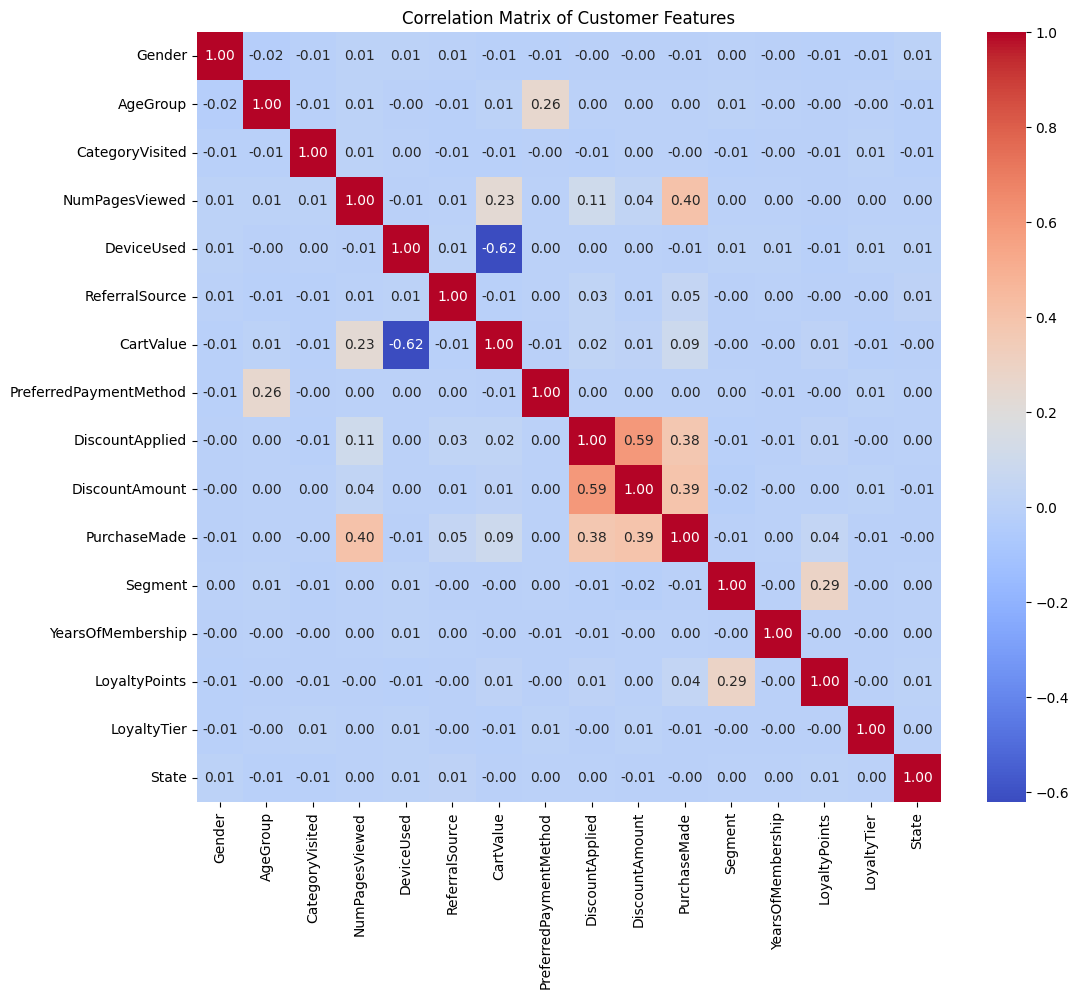

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Customer Features')
plt.show()

We can see that only variables that have correlation with purchase made higher than 0.1 are Discount applied, discount amount and number of visited pages, thus we can try to create a model based on those 3 features

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.patches as mpatches

# Define features (X) and target variable (y)
X = df_cust[['DiscountAmount', 'DiscountApplied', 'NumPagesViewed']]
y = df_cust['PurchaseMade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = False)


In [ ]:
# Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)
print(classification_report(y_test, logreg_pred))


# Extract feature weights (coefficients)
coefficients = logreg_model.coef_[0]
feature_weights = pd.DataFrame({'Feature': X.columns, 'Weight': coefficients})
print("\nFeature Weights:\n", feature_weights)

Logistic Regression Accuracy: 0.78025
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2351
           1       0.75      0.70      0.72      1649

    accuracy                           0.78      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.78      0.78      0.78      4000


Feature Weights:
            Feature    Weight
0   DiscountAmount  2.917425
1  DiscountApplied  1.614804
2   NumPagesViewed  0.200596


In [ ]:
#decision tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
trq_accuracy = accuracy_score(y_test, tree_pred)
print("Decision Tree Accuracy:", trq_accuracy)
print(classification_report(y_test, tree_pred))

# Extract feature importances
importances = tree_model.feature_importances_
rf_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print("\nFeature Importances:\n", rf_importances)

Decision Tree Accuracy: 0.8805
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2351
           1       0.90      0.80      0.85      1649

    accuracy                           0.88      4000
   macro avg       0.88      0.87      0.87      4000
weighted avg       0.88      0.88      0.88      4000


Feature Importances:
            Feature  Importance
0   DiscountAmount    0.487831
1  DiscountApplied    0.004687
2   NumPagesViewed    0.507482


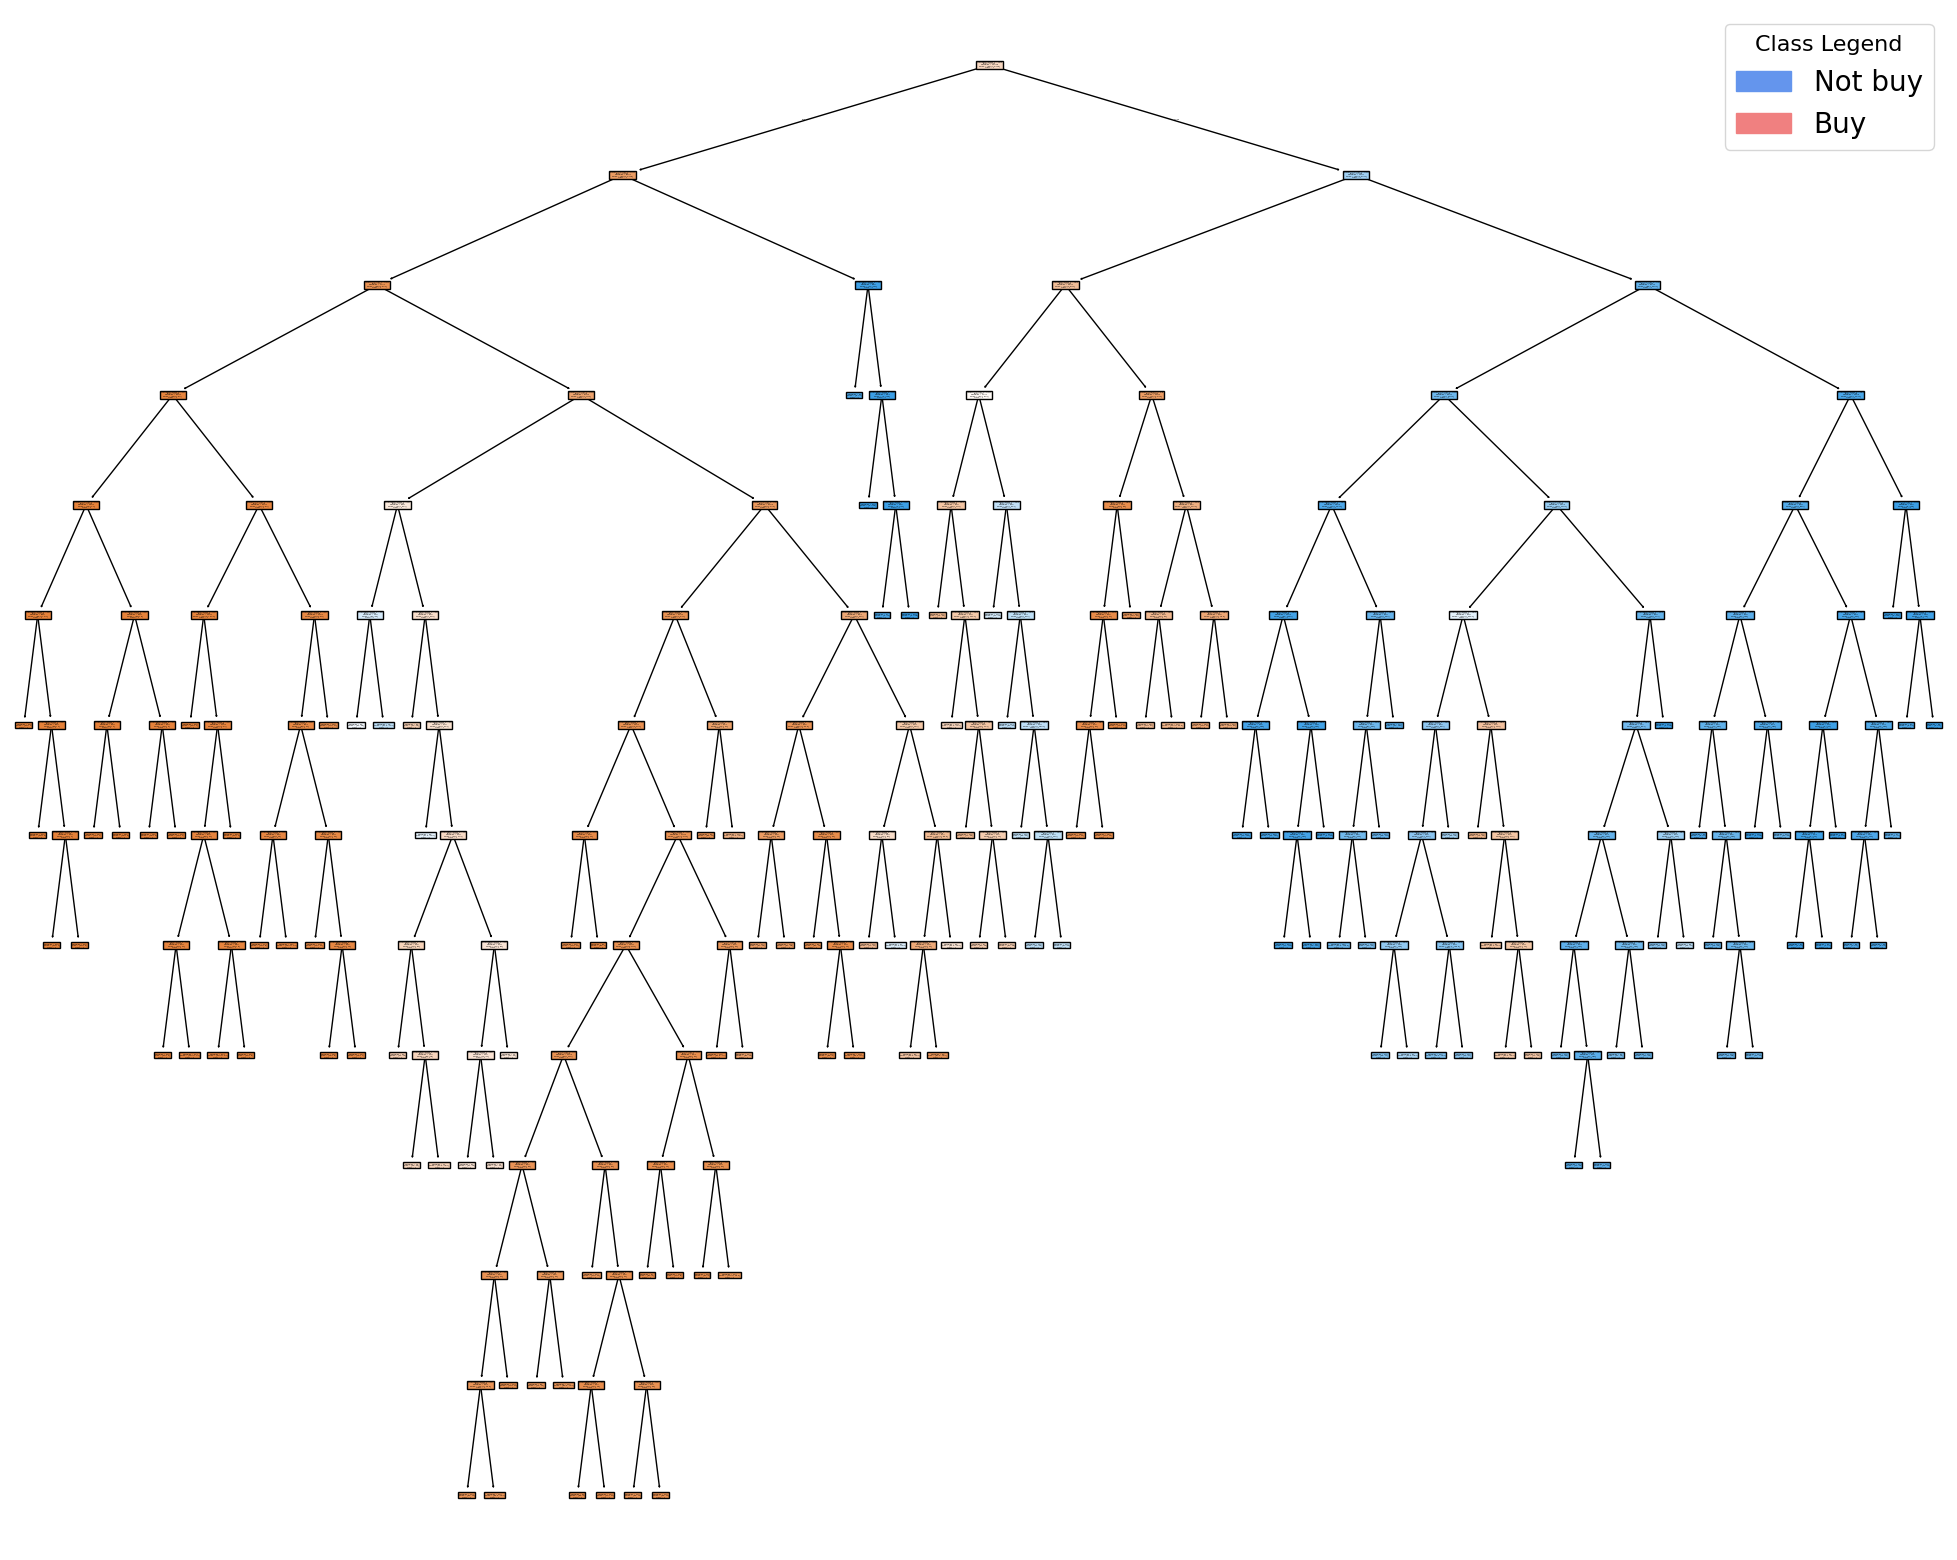

In [ ]:
import matplotlib.patches as mpatches

# Plot the decision tree
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=[str(cls) for cls in y.unique()],  # Convert unique values to strings
    filled=True
)



# Manually define labels for each class
class_labels = ["Not buy", "Buy"]
class_colors = ["cornflowerblue", "lightcoral"]

# Create a legend with custom labels
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(class_colors, class_labels)]
plt.legend(
    handles=legend_handles,
    title="Class Legend",
    loc="upper right",
    prop={'size': 20},
    title_fontsize='16'
)

plt.show()

We would first like to note that because this tree is so large, some leaf nodes might contain only a small number of samples, decreasing decision reliability for those nodes. In addition to this we would like to note that the complexity of this tree could also suggest overfitting, which can reduce the models ability to generalize to new, unseen data. Thus, leading to lower performance when predicting on test data. Due to the complexity and risk of overfitting of this graph, we will simplify the tree to see if it will benefit our generalization of the data.

In [ ]:
#decision trees
tree_model = tree.DecisionTreeClassifier(max_leaf_nodes=6)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
trq_accuracy = accuracy_score(y_test, tree_pred)
print("Decision Tree Accuracy:", trq_accuracy)
print(classification_report(y_test, tree_pred))

# Extract feature importances
importances = tree_model.feature_importances_
rf_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print("\nFeature Importances:\n", rf_importances)

Decision Tree Accuracy: 0.8475
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2351
           1       0.87      0.74      0.80      1649

    accuracy                           0.85      4000
   macro avg       0.85      0.83      0.84      4000
weighted avg       0.85      0.85      0.85      4000


Feature Importances:
            Feature  Importance
0   DiscountAmount    0.465849
1  DiscountApplied    0.000000
2   NumPagesViewed    0.534151


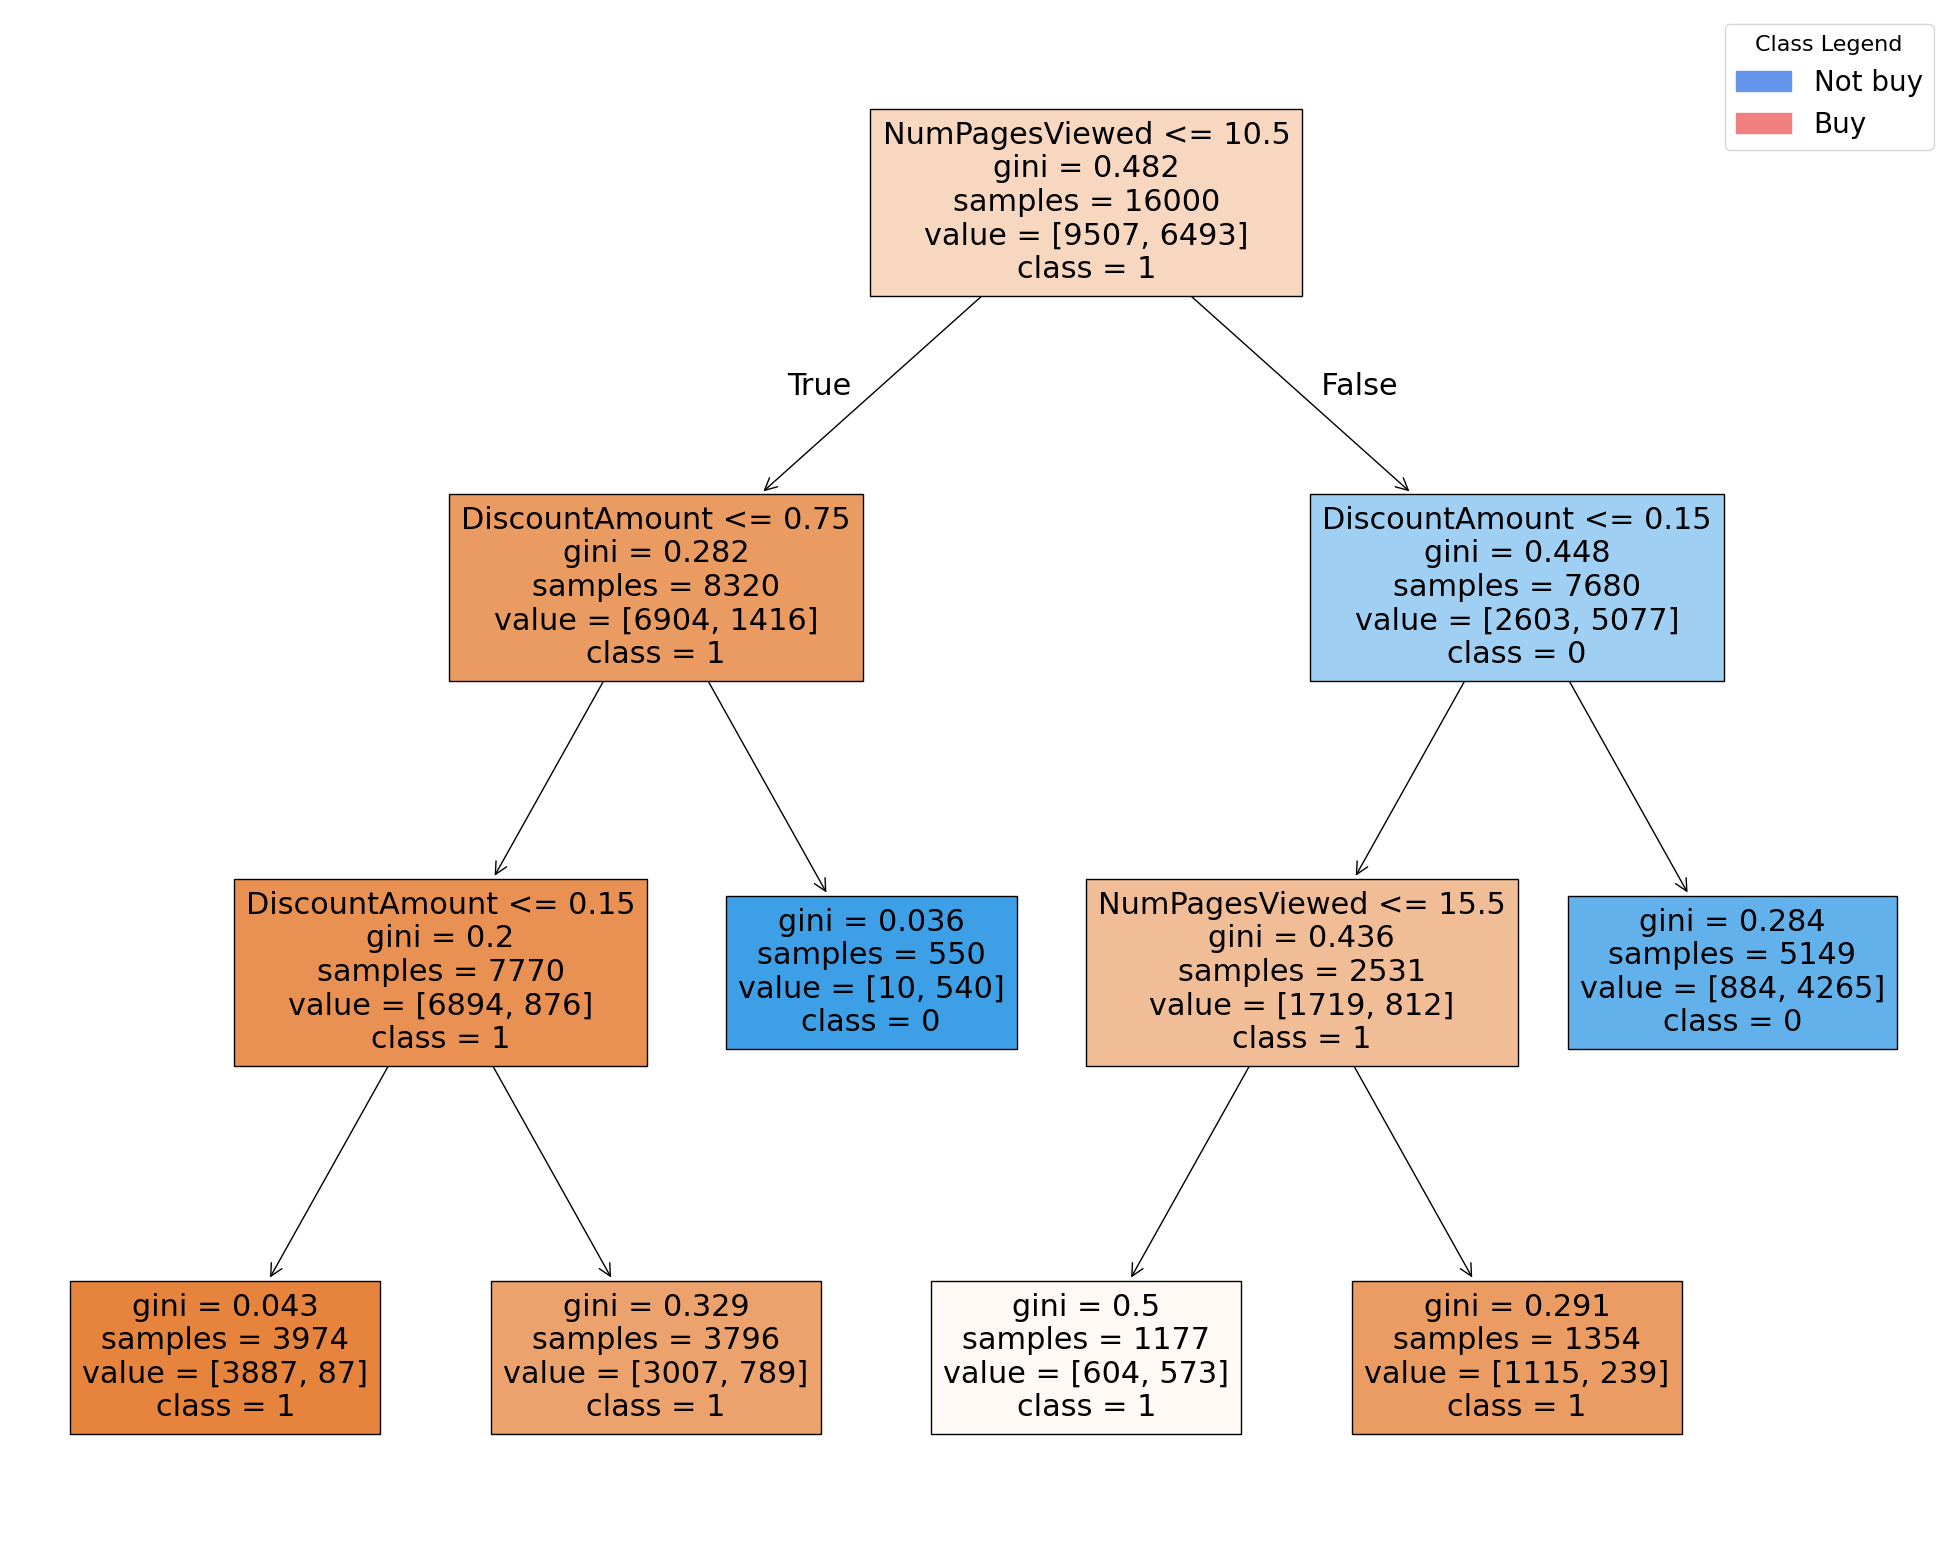

In [ ]:
# Plot the decision tree
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=[str(cls) for cls in y.unique()],  # Convert unique values to strings
    filled=True
)



# Manually define labels for each class
class_labels = ["Not buy", "Buy"]
class_colors = ["cornflowerblue", "lightcoral"]

# Create a legend with custom labels
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(class_colors, class_labels)]
plt.legend(
    handles=legend_handles,
    title="Class Legend",
    loc="upper right",
    prop={'size': 20},
    title_fontsize='16'
)

plt.show()

From the visual above we first noticed that the tree primarily uses NumPagesViewed and DisciuntAmount as decision variables. The lower values of DiscountAmount, <= 0.15, and NumPagesViewed, <=10.5, are highly predictive of a "Buy" outcome. The higher vlaues tend to favor "Not Buy", but there is more variability and impurity in those branches. The leaf nodes represent terminal decisions, where no further splitting is done. As we can see in the left most leaf node, there is a very low Gini of 0.043 with 3974 samples, almost the whole class 1, indicating high confidence in the "Buy" class. Overall, this tree indicated that a combination of fewer pages viewed and lower discounts is highly associated with a "Buy" decison. From the two decision trees this one seems to be the best choice of the two as it gives us a clearer visual and better sense of the data.


### business implications

With this information, we can optimize our marketing efforts to these customers with ad placement or offering personalized dicounts based on this behavior. Also, because of the customers buying more after viewing less pages we can infer that simplifying the websites layout and making it easier to navigate could help to boost our sales.

In [ ]:
# Logistic Regression Coefficients
logreg_coefficients = pd.DataFrame({'Feature': X.columns, 'Logistic Coefficient': logreg_model.coef_[0]})

# Combine and display for comparison
comparison = logreg_coefficients.merge(rf_importances, on='Feature')
print("\nComparison of Logistic Regression Coefficients and Decision Tree Feature Importances:\n")
print(comparison)



Comparison of Logistic Regression Coefficients and Decision Tree Feature Importances:

           Feature  Logistic Coefficient  Importance
0   DiscountAmount              2.917425    0.465849
1  DiscountApplied              1.614804    0.000000
2   NumPagesViewed              0.200596    0.534151


Taking a look at the comparison above we gain information about our data. For the linear regression models we can see that the DiscountAmount and DiscountApplied are the most influential in logistic regression, with DiscountAmount having the highest impact. Then for the decision tree models we find that NumPagesViewed is the most impactful, DiscountAmount is second most impactful and DiscountApplied contributes nothing. From these observations we can assume NumPagesViewed helped the tree capture useful decision boundaries that are potentially more complex or non-linear.

For the features, DiscountAmount is important for both models meaning it is a strong predictor for the target variable. DiscountApplied has a high logistic regression coefficient but no decison tree importance and this lack of unique value could mean that it is not essential for complex business boundaries. NumPagesViewed seems to be more infuential for the decision tree, maybe because of its non-linear relationship with the target.

Overall, both DiscountAmount and NumPagesViewed are valuable features, but influence the models differently.

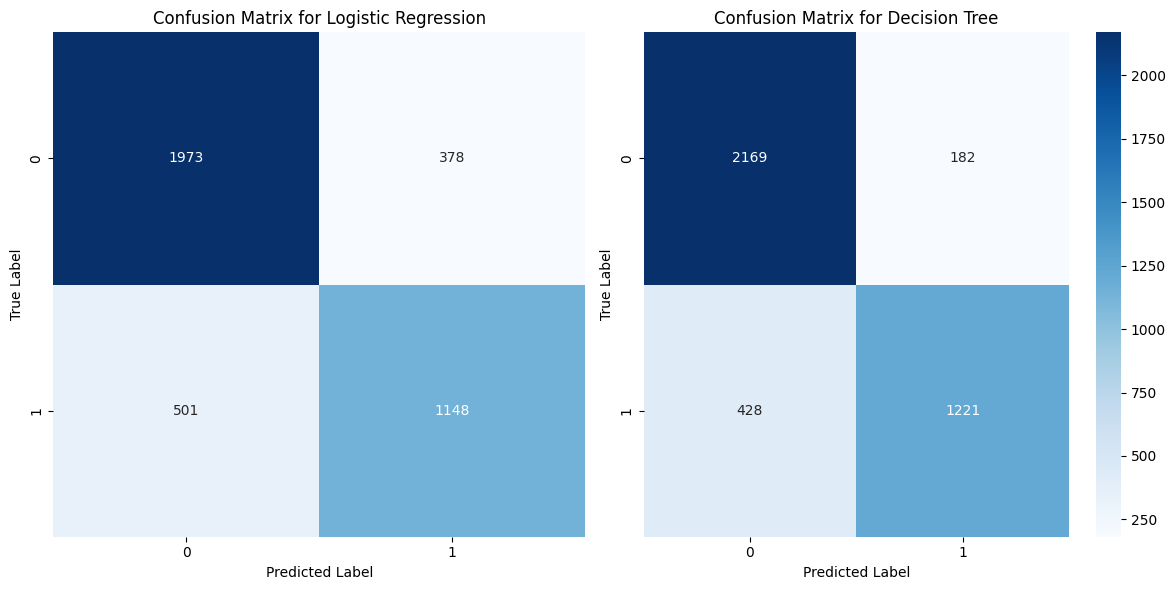

In [ ]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Compute confusion matrices
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
rf_conf_matrix = confusion_matrix(y_test, tree_pred)

# Logistic Regression Confusion Matrix
sns.heatmap(logreg_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title("Confusion Matrix for Logistic Regression")
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Decision Tree Confusion Matrix
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, ax=axes[1])
axes[1].set_title("Confusion Matrix for Decision Tree")
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

Conclusion for the 2nd Question

The models above helps us to classify and predict if a customer is going to buy when accessing our website because it classifies customers into two categories: those who are likely to buy and those who are not. When comparing the two models, it seems that the Confusion Matrix for the Decision Tree model is the better of the two. We say this because it has correctly classified both buyers and non buyers more accurately than the confusion matrix for logistic regression. We know this because from the Decision Tree model we recieved more true positives and fewer fasle positives and false negatives. So, for the puropses of classifying and predicting if a customer is going to buy when accessing our website, Regresssion Forest is most alligned with our business goal.

Since we're prioritizing recall to ensure that we capture as many potential buyers as possible, the Decision Tree model performs better than the Logistic Regression model on this metric. With a recall of 0.80 for the target class (buyers), the Decision Tree model captures a larger portion of actual buyers than Logistic Regression does (0.70). A model with 80% recall may drive significant sales if each additional conversion has a high revenue impact.

However, if marketing costs per customer are high, those false positives may reduce profitability. In any case, a model with a better balance between recall and precision should be chosen, and in this case it's the Decision Tree model.